# Data Mining Project | Amazing International Airlines Inc.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler

## Table of Contents
- [Business Understanding](#business-understanding)
- [Data Understanding](#data-understanding)
  - [Customer Database](#customer-database)
    - [Reading the data](#reading-the-data)
    - [Metadata](#metadata)
    - [Initial Analysis](#initial-analysis)
    - [Data Quality Checks](#data-quality-checks)
  - [Flights Database](#flights-database)
    - [Reading the data](#reading-the-data-1)
    - [Metadata](#metadata-1)
    - [Initial Analysis](#initial-analysis-1)
    - [Data Quality Checks](#data-quality-checks-1)
- [Data Preparation](#data-preparation)
  - [Customers Database](#customers-database)
    - [Data Types](#data-types)
    - [Duplicates](#duplicates)
    - [Missing Values](#missing-values)
    - [Coherence Check](#coherence-check)
  - [Flights Database](#flights-database-1)
    - [Data Types](#data-types-1)
    - [Duplicates](#duplicates-1)
    - [Coherence Check](#coherence-check-1)
    - [Coherence Check on both databases](#coherence-check-on-both-databases)
- [Data Exploration](#data-exploration)
  - [Customer](#customer)
  - [Distributions of Categorical Features](#distributions-of-categorical-features)
  - [Distribution of Numerical Features](#distribution-of-numerical-features)

## Business Understanding

AIAI aims to use customer data to understand their behaviors, with the goal of improving satisfaction, customer value, and profitability. The main challenge is to segment customers based on their travel habits and loyalty, enabling the creation of personalized marketing and optimized services. The project aims to transform these analytical findings into actionable business strategies.

## Data Understanding

### Customer Database

#### Reading the data

In [2]:
customer_data = pd.read_csv("DM_AIAI_CustomerDB.csv",index_col=0)

#### Metadata
- *Loyalty#* - Unique customer identifier for loyalty program members
- *First Name* - Customer's first name
- *Last Name* -	Customer's last name
- *Customer Name* - Customer's full name (concatenated)
- *Country* - Customer's country of residence
- *Province or State* - Customer's province or state
- *City* - Customer's city of residence
- *Latitude* - Geographic latitude coordinate of customer location
- *Longitude* - Geographic longitude coordinate of customer location
- *Postal code* - Customer's postal/ZIP code
- *Gender* - Customer's gender
- *Education* - Customer's highest education level (Bachelor, College, etc.)
- *Location Code*- Urban/Suburban/Rural classification of customer residence
- *Income* - Customer's annual income
- *Marital Status* - Customer's marital status (Married, Single, Divorced)
- *LoyaltyStatus* - Current tier status in loyalty program (Star > Nova > Aurora)
- *EnrollmentDateOpening* - Date when customer joined the loyalty program
- *CancellationDate* - Date when customer left the program
- *Customer Lifetime Value* - Total calculated monetary value of customer relationship
- *EnrollmentType* - Method of joining loyalty program


#### Initial Analysis
General idea of the data structure, column names and types of values each variable contains.

In [3]:
customer = customer_data.copy()
customer.head(3)

Loyalty# First Name    Last Name        Customer Name Country  \
0    480934    Cecilia  Householder  Cecilia Householder  Canada   
1    549612      Dayle        Menez          Dayle Menez  Canada   
2    429460     Necole       Hannon        Necole Hannon  Canada   

  Province or State       City   Latitude   Longitude Postal code  Gender  \
0           Ontario    Toronto  43.653225  -79.383186     M2Z 4K1  female   
1           Alberta   Edmonton  53.544388 -113.490930     T3G 6Y6    male   
2  British Columbia  Vancouver  49.282730 -123.120740     V6E 3D9    male   

  Education Location Code   Income Marital Status LoyaltyStatus  \
0  Bachelor         Urban  70146.0        Married          Star   
1   College         Rural      0.0       Divorced          Star   
2   College         Urban      0.0         Single          Star   

  EnrollmentDateOpening CancellationDate  Customer Lifetime Value  \
0             2/15/2019              NaN                  3839.14   
1              3/9/2019              NaN                  3839.61   
2             7/14/2017         1/8/2021                  3839.75   

  EnrollmentType  
0       Standard  
1       Standard  
2       Standard

In [4]:
print(f"Numbers of lines and columns: {customer.shape}")

Numbers of lines and columns: (16921, 20)


In [5]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16921 entries, 0 to 19
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loyalty#                 16921 non-null  int64  
 1   First Name               16921 non-null  object 
 2   Last Name                16921 non-null  object 
 3   Customer Name            16921 non-null  object 
 4   Country                  16921 non-null  object 
 5   Province or State        16921 non-null  object 
 6   City                     16921 non-null  object 
 7   Latitude                 16921 non-null  float64
 8   Longitude                16921 non-null  float64
 9   Postal code              16921 non-null  object 
 10  Gender                   16921 non-null  object 
 11  Education                16921 non-null  object 
 12  Location Code            16921 non-null  object 
 13  Income                   16901 non-null  float64
 14  Marital Status           16921

In [6]:
customer.describe(include="all").T

count unique          top   freq           mean  \
Loyalty#                 16921.0    NaN          NaN    NaN  550197.393771   
First Name                 16921   4941       Stacey     13            NaN   
Last Name                  16921  15404        Ypina      4            NaN   
Customer Name              16921  16921  Emma Martin      1            NaN   
Country                    16921      1       Canada  16921            NaN   
Province or State          16921     11      Ontario   5468            NaN   
City                       16921     29      Toronto   3390            NaN   
Latitude                 16921.0    NaN          NaN    NaN        47.1745   
Longitude                16921.0    NaN          NaN    NaN     -91.814768   
Postal code                16921     75      V6E 3D9    917            NaN   
Gender                     16921      2       female   8497            NaN   
Education                  16921      5     Bachelor  10586            NaN   
Location Code              16921      3     Suburban   5716            NaN   
Income                   16901.0    NaN          NaN    NaN     37758.0384   
Marital Status             16921      3      Married   9842            NaN   
LoyaltyStatus              16921      3         Star   7761            NaN   
EnrollmentDateOpening      16921   2449     4/3/2015     34            NaN   
CancellationDate            2310   1260     7/7/2020      8            NaN   
Customer Lifetime Value  16901.0    NaN          NaN    NaN    7990.460188   
EnrollmentType             16921      2     Standard  15773            NaN   

                                   std        min        25%        50%  \
Loyalty#                 259251.503597   100011.0   326823.0   550896.0   
First Name                         NaN        NaN        NaN        NaN   
Last Name                          NaN        NaN        NaN        NaN   
Customer Name                      NaN        NaN        NaN        NaN   
Country                            NaN        NaN        NaN        NaN   
Province or State                  NaN        NaN        NaN        NaN   
City                               NaN        NaN        NaN        NaN   
Latitude                      3.307971  42.984924  44.231171  46.087818   
Longitude                    22.242429 -135.05684 -120.23766 -79.383186   
Postal code                        NaN        NaN        NaN        NaN   
Gender                             NaN        NaN        NaN        NaN   
Education                          NaN        NaN        NaN        NaN   
Location Code                      NaN        NaN        NaN        NaN   
Income                    30368.992499        0.0        0.0    34161.0   
Marital Status                     NaN        NaN        NaN        NaN   
LoyaltyStatus                      NaN        NaN        NaN        NaN   
EnrollmentDateOpening              NaN        NaN        NaN        NaN   
CancellationDate                   NaN        NaN        NaN        NaN   
Customer Lifetime Value    6863.173093    1898.01    3979.72    5780.18   
EnrollmentType                     NaN        NaN        NaN        NaN   

                               75%        max  
Loyalty#                  772438.0   999999.0  
First Name                     NaN        NaN  
Last Name                      NaN        NaN  
Customer Name                  NaN        NaN  
Country                        NaN        NaN  
Province or State              NaN        NaN  
City                           NaN        NaN  
Latitude                  49.28273  60.721188  
Longitude               -74.596184 -52.712578  
Postal code                    NaN        NaN  
Gender                         NaN        NaN  
Education                      NaN        NaN  
Location Code                  NaN        NaN  
Income                     62396.0    99981.0  
Marital Status                 NaN        NaN  
LoyaltyStatus                  NaN        Na

#### Data Quality Checks

In [7]:
customer.replace("", np.nan, inplace=True)
customer.isna().sum()

Loyalty#                       0
First Name                     0
Last Name                      0
Customer Name                  0
Country                        0
Province or State              0
City                           0
Latitude                       0
Longitude                      0
Postal code                    0
Gender                         0
Education                      0
Location Code                  0
Income                        20
Marital Status                 0
LoyaltyStatus                  0
EnrollmentDateOpening          0
CancellationDate           14611
Customer Lifetime Value       20
EnrollmentType                 0
dtype: int64

We have 20 customers without income data, 20 customers without Customer Lifetime Value data and 14611 customers without CancellationDate data.

In [8]:
customer.duplicated().sum()

np.int64(0)

We have no duplicated rows in our data.

### Flights Database

#### Reading the data

In [9]:
flight_data = pd.read_csv("DM_AIAI_FlightsDB.csv")

#### Metadata
- *Variable* - Description
- *Loyalty#* - Unique customer identifier linking to CustomerDB
- *Year* -	Year of flight activity record
- *Month* - Month of flight activity record (1-12)
- *YearMonthDate* - First day of the month for the activity period
- *NumFlights* - Total number of flights taken by customer in the month
- *NumFlightsWithCompanions* - Number of flights where customer traveled with companions
- *DistanceKM* - Total distance traveled in kilometers for the month
- *PointsAccumulated* - Loyalty points earned by customer during the month
- *PointsRedeemed* - Loyalty points spent/redeemed by customer during the month
- *DollarCostPointsRedeemed* - Dollar value of points redeemed during the month

#### Initial Analysis

General idea of the data structure, column names and types of values each variable contains.

In [10]:
flight = flight_data.copy()
flight.head(3)

Loyalty#  Year  Month YearMonthDate  NumFlights  NumFlightsWithCompanions  \
0    413052  2021     12     12/1/2021         2.0                       2.0   
1    464105  2021     12     12/1/2021         0.0                       0.0   
2    681785  2021     12     12/1/2021        10.0                       3.0   

   DistanceKM  PointsAccumulated  PointsRedeemed  DollarCostPointsRedeemed  
0      9384.0              938.0             0.0                       0.0  
1         0.0                0.0             0.0                       0.0  
2     14745.0             1474.0             0.0                       0.0

In [11]:
print(f"Numbers of lines and columns: {flight.shape}")

Numbers of lines and columns: (608436, 10)


In [12]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608436 entries, 0 to 608435
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Loyalty#                  608436 non-null  int64  
 1   Year                      608436 non-null  int64  
 2   Month                     608436 non-null  int64  
 3   YearMonthDate             608436 non-null  object 
 4   NumFlights                608436 non-null  float64
 5   NumFlightsWithCompanions  608436 non-null  float64
 6   DistanceKM                608436 non-null  float64
 7   PointsAccumulated         608436 non-null  float64
 8   PointsRedeemed            608436 non-null  float64
 9   DollarCostPointsRedeemed  608436 non-null  float64
dtypes: float64(6), int64(3), object(1)
memory usage: 46.4+ MB


In [13]:
flight.describe(include="all").T

count unique        top   freq           mean  \
Loyalty#                  608436.0    NaN        NaN    NaN  550037.873084   
Year                      608436.0    NaN        NaN    NaN         2020.0   
Month                     608436.0    NaN        NaN    NaN            6.5   
YearMonthDate               608436     36  12/1/2021  16901            NaN   
NumFlights                608436.0    NaN        NaN    NaN       3.908107   
NumFlightsWithCompanions  608436.0    NaN        NaN    NaN       0.983944   
DistanceKM                608436.0    NaN        NaN    NaN    7939.341419   
PointsAccumulated         608436.0    NaN        NaN    NaN     793.777781   
PointsRedeemed            608436.0    NaN        NaN    NaN     235.251678   
DollarCostPointsRedeemed  608436.0    NaN        NaN    NaN       2.324835   

                                    std       min       25%       50%  \
Loyalty#                  258935.180575  100018.0  326961.0  550834.0   
Year                           0.816497    2019.0    2019.0    2020.0   
Month                          3.452055       1.0      3.75       6.5   
YearMonthDate                       NaN       NaN       NaN       NaN   
NumFlights                     5.057889       0.0       0.0       0.0   
NumFlightsWithCompanions       2.003785       0.0       0.0       0.0   
DistanceKM                 10260.421873       0.0       0.0     856.4   
PointsAccumulated           1025.918521       0.0       0.0    85.275   
PointsRedeemed               983.233374       0.0       0.0       0.0   
DollarCostPointsRedeemed       9.725168       0.0       0.0       0.0   

                                75%       max  
Loyalty#                   772194.0  999986.0  
Year                         2021.0    2021.0  
Month                          9.25      12.0  
YearMonthDate                   NaN       NaN  
NumFlights                      7.2      21.0  
NumFlightsWithCompanions        0.9      11.0  
DistanceKM                15338.175   42040.0  
PointsAccumulated         1533.7125    4204.0  
PointsRedeemed                  0.0    7496.0  
DollarCostPointsRedeemed        0.0      74.0

#### Data Quality Checks

In [14]:
flight.replace("", np.nan, inplace=True)
flight.isna().sum()

Loyalty#                    0
Year                        0
Month                       0
YearMonthDate               0
NumFlights                  0
NumFlightsWithCompanions    0
DistanceKM                  0
PointsAccumulated           0
PointsRedeemed              0
DollarCostPointsRedeemed    0
dtype: int64

We have no missing data.

In [15]:
flight.duplicated().sum()

np.int64(2903)

We have 2903 duplicated rowns in our data, that we will look at later.

# Data Preparation

### Customers Database

#### Data Types

In [16]:
customer.dtypes

Loyalty#                     int64
First Name                  object
Last Name                   object
Customer Name               object
Country                     object
Province or State           object
City                        object
Latitude                   float64
Longitude                  float64
Postal code                 object
Gender                      object
Education                   object
Location Code               object
Income                     float64
Marital Status              object
LoyaltyStatus               object
EnrollmentDateOpening       object
CancellationDate            object
Customer Lifetime Value    float64
EnrollmentType              object
dtype: object

The Enrollment Date Opening and Cancellation Dates can be converted to datetime type.

In [17]:
customer["EnrollmentDateOpening"] = pd.to_datetime(customer["EnrollmentDateOpening"])
customer["CancellationDate"] = pd.to_datetime(customer["CancellationDate"], errors="coerce")

#### Duplicates

To use the 'Loyalty#' column as the dataframe's index, it was essential to first confirm that it contained only unique values. An index acts as a primary key for data retrieval, and duplicate entries would make this unreliable.

Upon inspection, some 'Loyalty#' IDs were found to be duplicated. Since there was no clear way to determine which entry represented the true customer record (the "source of truth"), the most robust decision was to remove all records associated with these ambiguous IDs. This data cleansing step ensures the integrity of the dataset, leaving only customers with a single, unique 'Loyalty#' identifier, which can now be reliably set as the index.

In [18]:
duplicated_loyalty = customer_data.duplicated(subset=['Loyalty#'], keep=False)
duplicated_loyalty_list = customer_data[duplicated_loyalty]['Loyalty#'].unique()
print(f"Duplicated Loyaltys {len(duplicated_loyalty_list)}")
customer = customer[customer['Loyalty#'].isin(duplicated_loyalty_list) == False]
print(f"For the initial customer data we have {len(customer_data)} records.\n"
      f"We identified {len(duplicated_loyalty_list)} 'Loyalty#' IDs that were duplicated or appears repeatedly.\n"
      f"So the final len of the data set is {len(customer)}.")

Duplicated Loyaltys 163
For the initial customer data we have 16921 records.
We identified 163 'Loyalty#' IDs that were duplicated or appears repeatedly.
So the final len of the data set is 16594.


In [19]:
customer.set_index("Loyalty#", inplace=True)

#### Missing Values

In [20]:
customer[customer["Income"].isna()].tail(3)

First Name Last Name    Customer Name Country Province or State  \
Loyalty#                                                                   
100014       Amelia   Bennett   Amelia Bennett  Canada     New Brunswick   
100015     Benjamin    Wilson  Benjamin Wilson  Canada            Quebec   
100016         Emma    Martin      Emma Martin  Canada  British Columbia   

                  City   Latitude   Longitude Postal code  Gender Education  \
Loyalty#                                                                      
100014         Moncton  46.051866  -64.825428     G2S 2B6    male  Bachelor   
100015     Quebec City  46.862970  -71.133444     B1Z 8T3  female   College   
100016    Dawson Creek  55.720562 -120.160090     M4A 1E4  female    Master   

         Location Code  Income Marital Status LoyaltyStatus  \
Loyalty#                                                      
100014           Rural     NaN        Married          Star   
100015           Urban     NaN        Married          Star   
100016        Suburban     NaN         Single          Star   

         EnrollmentDateOpening CancellationDate  Customer Lifetime Value  \
Loyalty#                                                                   
100014              2020-11-28       2020-11-28                      NaN   
100015              2020-04-09       2020-04-09                      NaN   
100016              2020-07-21       2020-07-21                      NaN   

         EnrollmentType  
Loyalty#                 
100014         Standard  
100015         Standard  
100016         Standard

The customers with missing income information also have a Customer Lifetime Value equal to 0, which we believe is because their cancellation date is the same as their enrollment date, and it has no value for the company.

In [21]:
customer_NaN_income = customer["Income"].isna().mean() * 100
print(f"The percentage of customers with missing data about income is {customer_NaN_income:.2f} %.")

The percentage of customers with missing data about income is 0.12 %.


Because the percentage of missing data about income is 0.12 %, it is safe to remove this rows.

In [22]:
customer = customer.dropna(subset=['Income'])


#### Coherence Check

In [23]:
# Number of customers with available values in cancellation date
total_cancel_dates = len(customer[customer["CancellationDate"].notna()])
print(f"Number of available cancellation dates: {total_cancel_dates} ({((total_cancel_dates/len(customer))*100):.2f}%)")

Number of available cancellation dates: 2245 (13.55%)


Missing values in the CancellationDate column (which affects 86.45% of the customer base) are assumed to represent customers who have never officially terminated their loyalty membership. 

In [24]:
# Number of customers with cancelation date before the enrollment date
incoherent_cancel_dates = len(customer[customer['CancellationDate'] < customer['EnrollmentDateOpening']])
print(f"Number of incoherent dates: {incoherent_cancel_dates} ({((incoherent_cancel_dates/total_cancel_dates)*100):.2f}%)")

Number of incoherent dates: 199 (8.86%)


The 199 incoherent dates (CancellationDate < EnrollmentDateOpening) strongly suggest a business scenario where members re-enrolled in the loyalty program. It is possible that the CancellationDate reflects an old membership end,  while EnrollmentDateOpening records the start of their current re-activated membership.

This group represents a valuable segment of returned customers,  which we should give special attention during the segmentation phase. 

In [25]:
# Number of incoherent enrollment type 
cust_2021_promo = customer[customer["EnrollmentType"] == "2021 Promotion"].copy()
cust_2021_promo["EnrollmentYear"] = cust_2021_promo["EnrollmentDateOpening"].dt.year
incoherent_enrollment_type = cust_2021_promo[cust_2021_promo["EnrollmentYear"] !=2021.0]
print(f"Number of incoherent enrollment type (enrollment out of 2021): {len(incoherent_enrollment_type)}")

Number of incoherent enrollment type (enrollment out of 2021): 172


This check was performed to verify if the categorical feature "2021 Promotion" in EnrollmentType was chronologically coherent with the customer's EnrollmentDateOpening. The result shows that 172 of customers tagged with the "2021 Promotion" were registered in earlier years (2015, 2017,...).

The EnrollmentType variable remains useful for demographic/psychographic segmentation (identifying customers sensitive to incentives), but its value cannot be strictly relied upon for calculating customer longevity.

In [26]:
# Number of customer's names that don´t correspond to concatenation of first name and last name
coherent_names = ( customer["First Name"].str.strip()+" "+customer["Last Name"].str.strip())
incoherent_names_condition = (customer["Customer Name"].str.strip() != coherent_names.str.strip())
incoherent_names = customer[incoherent_names_condition]
print(f"Number of unmatched customer names: {len(incoherent_names)}")

Number of unmatched customer names: 0


Furthermore, comparing Customer Name against the concatenation of First Name and Last Name confirmed zero inconsistencies, demonstrating the perfect integrity of the customer identification fields.

### Flights Database

#### Data Types

In [27]:
flight.dtypes

Loyalty#                      int64
Year                          int64
Month                         int64
YearMonthDate                object
NumFlights                  float64
NumFlightsWithCompanions    float64
DistanceKM                  float64
PointsAccumulated           float64
PointsRedeemed              float64
DollarCostPointsRedeemed    float64
dtype: object

We decided to change the data types of variables NumFlights, NumFlightsWithCompanions, PointsAccumulated and PointsRedeemed to integers because these variables are discrete.
Also, the YearMonthDate variable can be converted to datetime type.

In [28]:
flight['YearMonthDate'] = pd.to_datetime(flight['YearMonthDate'], errors='coerce')

columns_to_convert = ["NumFlights", "NumFlightsWithCompanions", "PointsAccumulated", "PointsRedeemed"]
flight[columns_to_convert] = flight[columns_to_convert].astype(int)
print(flight[columns_to_convert].dtypes)

NumFlights                  int64
NumFlightsWithCompanions    int64
PointsAccumulated           int64
PointsRedeemed              int64
dtype: object


#### Duplicates

Following the removal of ambiguous 'Loyalty#' IDs from the customer dataset, the same filtering was applied to the flight dataset. This step was crucial for maintaining referential integrity, as it ensures that the flight data only contains records for customers who are verifiably present in the customer data.

In [29]:
flight = flight[flight['Loyalty#'].isin(duplicated_loyalty_list) == False]

In [30]:
flight.duplicated().sum()

np.int64(0)

Interestingly, this action also resolved all duplicate issues within the flight dataset, indicating that the duplicated entries were tied to the same problematic 'Loyalty#' IDs. This clean-up ensures both datasets are now consistent and aligned.

#### Coherence Check

In [31]:
# Number of flights uncoherent
print(f"Number of uncoherent number of flights: {len(flight[flight["NumFlightsWithCompanions"] > flight["NumFlights"]])}")

# Number of flights with uncoherent data of DistanceKM
print(f"Number of uncoherent number of KMs: {len(flight[flight["DistanceKM"] < flight["NumFlights"]])}")

# Number of points accumulated with 0 KM travelled
incoherent_points_condition = (flight["PointsAccumulated"] >0) & (flight["DistanceKM"] == 0)
incoherent_points = flight[incoherent_points_condition]
print(f"Number of incoherent points accumulated: {len(incoherent_points)}")

# Number of incoherent points redeemed or dollar cost points redeemed
incoherent_dollars_condition = (flight["PointsRedeemed"]>0) & (flight["DollarCostPointsRedeemed"]==0) | (flight["PointsRedeemed"]==0) & (flight["DollarCostPointsRedeemed"]>0)
incoherent_dollars = flight[incoherent_dollars_condition]
print(f"Number of incoherent dollars redeemed: {len(incoherent_dollars)}")

Number of uncoherent number of flights: 0
Number of uncoherent number of KMs: 0
Number of incoherent points accumulated: 0
Number of incoherent dollars redeemed: 0


The flight activity data demonstrates high internal coherence, with zero records showing logical inconsistencies between flight counts, distance traveled, point accumulation and dollar cost of points redeemed.

#### Coherence Check on both databases

In [32]:
# Number of incoherent customers flying after customer cancelling the membership
cust_cancelled = customer[customer["CancellationDate"].notna()].copy()

merged_flights_cust_cancel = pd.merge(
    customer[customer["CancellationDate"].notna()][["CancellationDate", "EnrollmentDateOpening"]],
    flight[["Loyalty#", "YearMonthDate", "NumFlights"]],
    left_index=True, right_on= "Loyalty#", how="inner"
)

flights_condition1 = (
    (merged_flights_cust_cancel["YearMonthDate"]> merged_flights_cust_cancel["CancellationDate"]) &
    (merged_flights_cust_cancel["NumFlights"]>0) &
    (merged_flights_cust_cancel["EnrollmentDateOpening"]<=merged_flights_cust_cancel["CancellationDate"])
)

flights1 = merged_flights_cust_cancel[flights_condition1]
print(f"Number of incoherent customers flying after customer cancelling the membership: {flights1["Loyalty#"].nunique()}")

Number of incoherent customers flying after customer cancelling the membership: 0


This test verified if any customer registered flight activity after their official cancellation date without having subsequently re-enrolled in the loyalty program. The results showed zero unique customers exhibiting this true logical incoherence. The previously observed post-cancellation activity is fully justified by customer re-enrollment, meaning the old CancellationDate simply serves as a historical record rather than a current status flag.

In [33]:
customer["CancellationDate"] = customer["CancellationDate"].fillna(pd.Timestamp("1904-01-01"))

dizer que agora sim mudamos o type do cancellation date 

## Data Exploration

#### Customer

### Distributions of Categorical Features

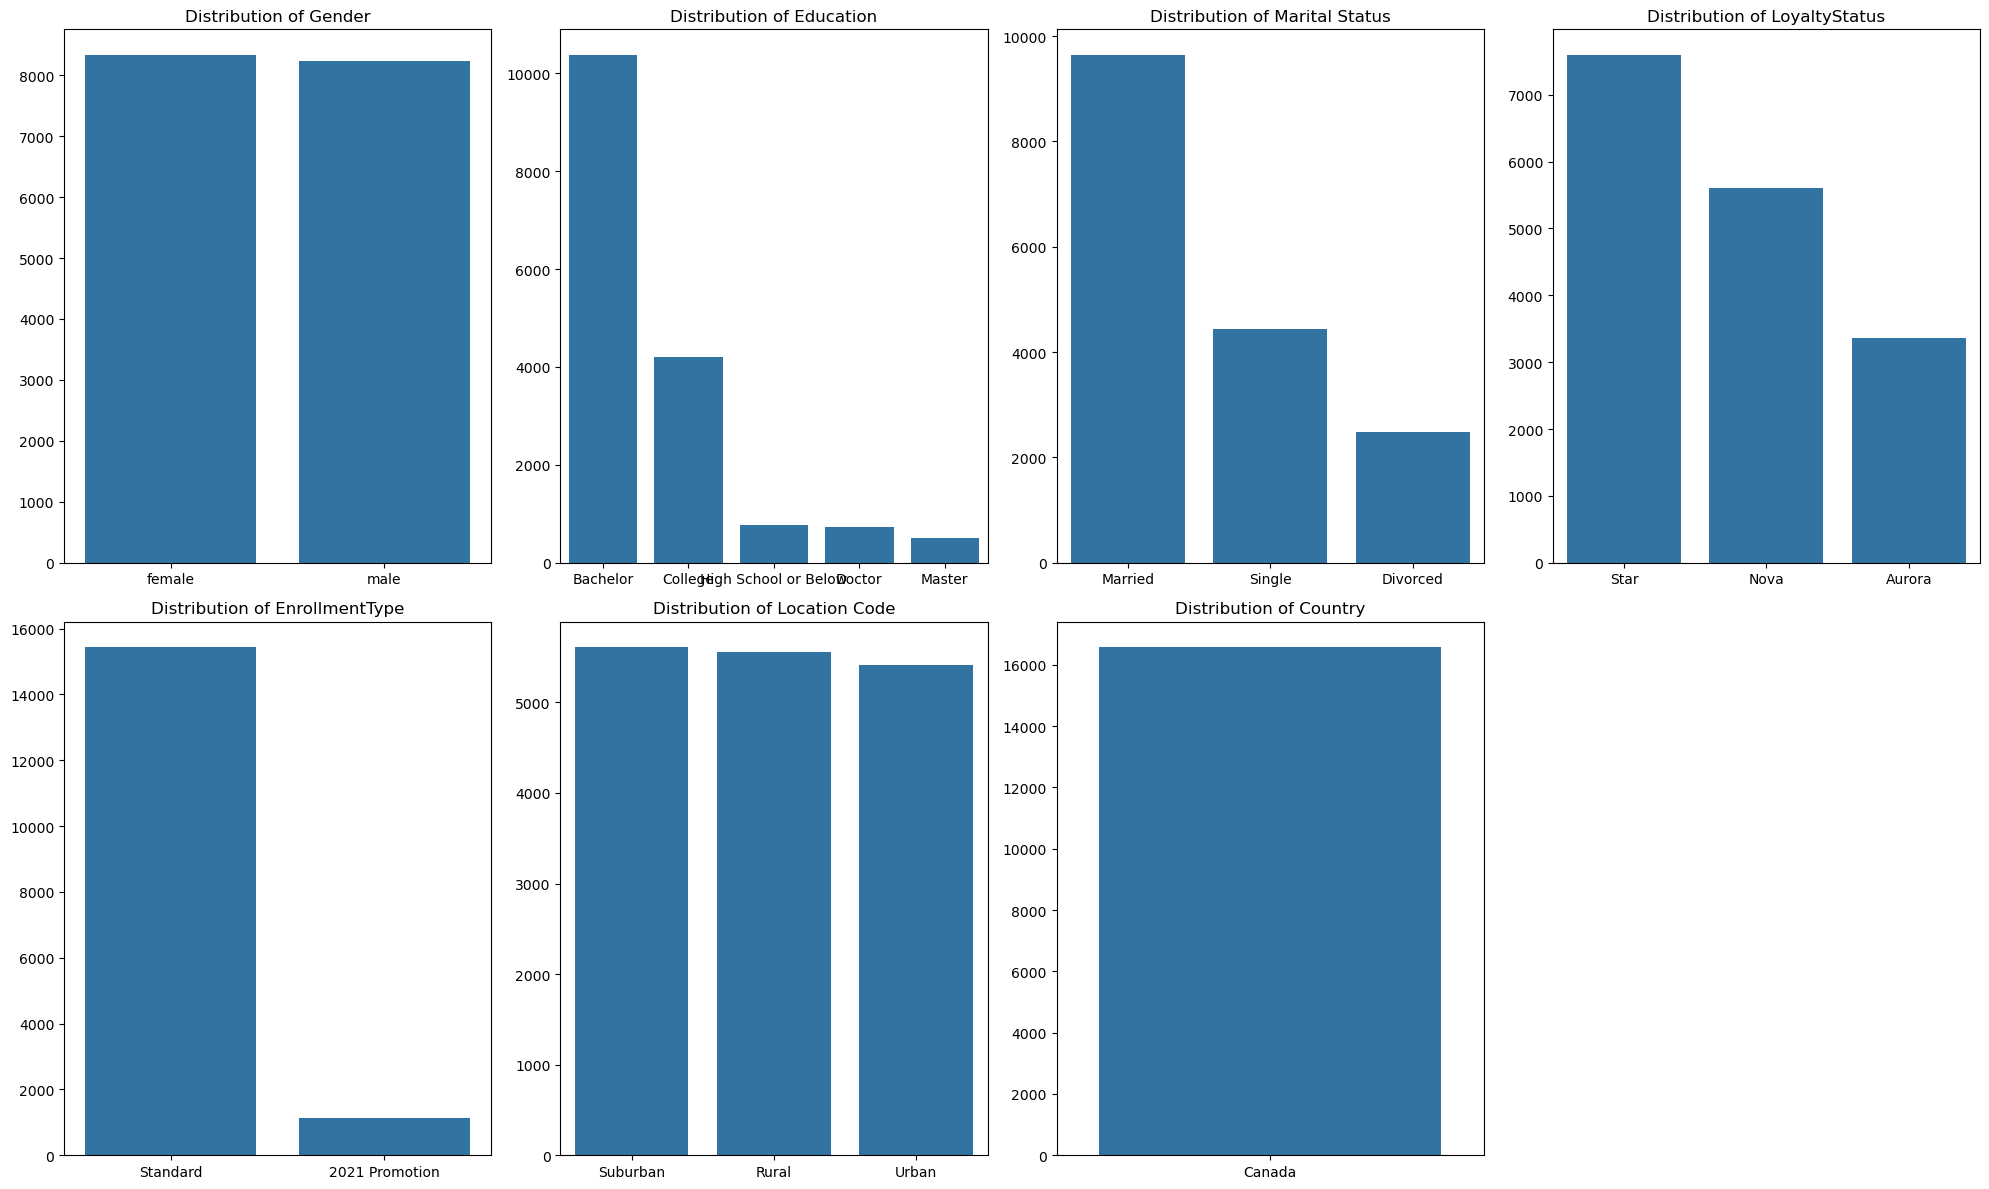

In [34]:

categorical_customer = ["Gender", "Education", "Marital Status", "LoyaltyStatus", "EnrollmentType", "Location Code","Country"]

plt.figure(figsize=(20, 12))
for i, col in enumerate(categorical_customer, 1):
    plt.subplot(2, 4, i)
    sns.countplot(x=col, data=customer, order=customer[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xlabel("")
    plt.ylabel("")
plt.tight_layout()
plt.show()


From these visualizations, we observe that the dataset shows no meaningful variation in gender or location type, suggesting that these variables may have limited discriminative power for segmentation.
Regarding education, the majority of loyalty members hold a Bachelor’s degree, followed by those with College-level education.
In terms of marital status, most customers are married, which may indicate a stable and mature demographic segment.
The loyalty status distribution reveals that most clients belong to the Star tier, followed by Nova and Aurora, highlighting a concentration in mid-level membership.
Finally, the enrollment type indicates that the majority of customers joined through the Standard enrollment process, which could suggest limited participation in promotional or referral programs.


### Distribution of Numerical Features

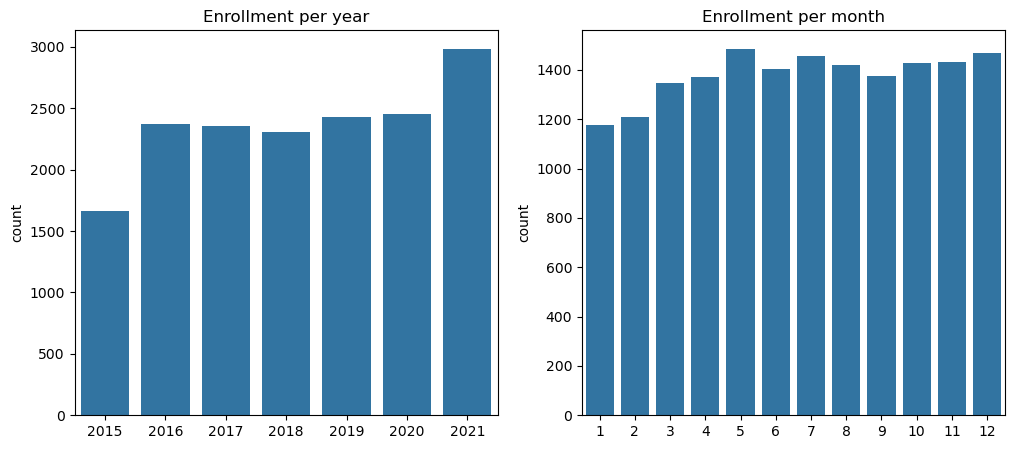

First Name    Last Name        Customer Name Country  \
Loyalty#                                                        
480934      Cecilia  Householder  Cecilia Householder  Canada   
549612        Dayle        Menez          Dayle Menez  Canada   
429460       Necole       Hannon        Necole Hannon  Canada   

         Province or State       City   Latitude   Longitude Postal code  \
Loyalty#                                                                   
480934             Ontario    Toronto  43.653225  -79.383186     M2Z 4K1   
549612             Alberta   Edmonton  53.544388 -113.490930     T3G 6Y6   
429460    British Columbia  Vancouver  49.282730 -123.120740     V6E 3D9   

          Gender Education Location Code   Income Marital Status  \
Loyalty#                                                           
480934    female  Bachelor         Urban  70146.0        Married   
549612      male   College         Rural      0.0       Divorced   
429460      male   College         Urban      0.0         Single   

         LoyaltyStatus EnrollmentDateOpening CancellationDate  \
Loyalty#                                                        
480934            Star            2019-02-15       1904-01-01   
549612            Star            2019-03-09       1904-01-01   
429460            Star            2017-07-14       2021-01-08   

          Customer Lifetime Value EnrollmentType  
Loyalty#                                          
480934                    3839.14       Standard  
549612                    3839.61       Standard  
429460                    3839.75       Standard

In [35]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x=customer["EnrollmentDateOpening"].dt.year, data=customer)
plt.title("Enrollment per year")
plt.xlabel("")

plt.subplot(1, 2, 2)
sns.countplot(x=customer["EnrollmentDateOpening"].dt.month, data=customer)
plt.title("Enrollment per month")
plt.xlabel("")
plt.show()
customer.head(3)

The analysis of enrollment trends shows a stable customer acquisition rate between 2016 and 2020, followed by a significant surge in 2021, which represents the highest volume of new enrollments within the dataset. This latest growth suggests successful recent marketing or promotional efforts and indicates a healthy expansion of the customer base. 2021 Promotion

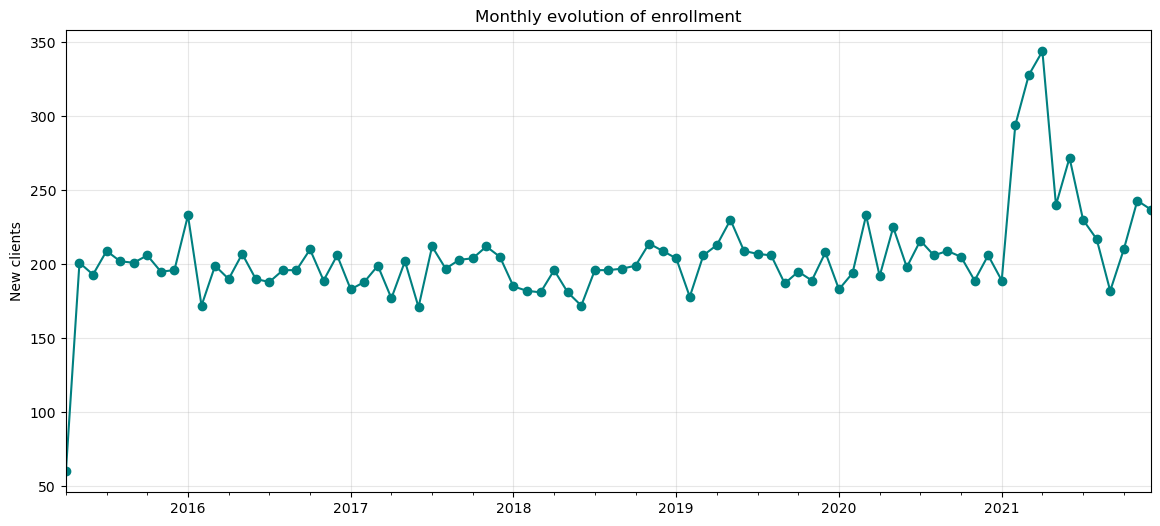

In [36]:
monthly_enrollments = customer.groupby(customer["EnrollmentDateOpening"].dt.to_period("M")).size().sort_index()
# converter índice PeriodIndex para timestamp para plot ficar com labels de datas
monthly_enrollments.index = monthly_enrollments.index.to_timestamp()

plt.figure(figsize=(14, 6))
monthly_enrollments.plot(kind='line', marker='o', color='teal')
plt.title("Monthly evolution of enrollment")
plt.xlabel("")
plt.ylabel("New clients")
plt.grid(True, alpha=0.3)
plt.show()

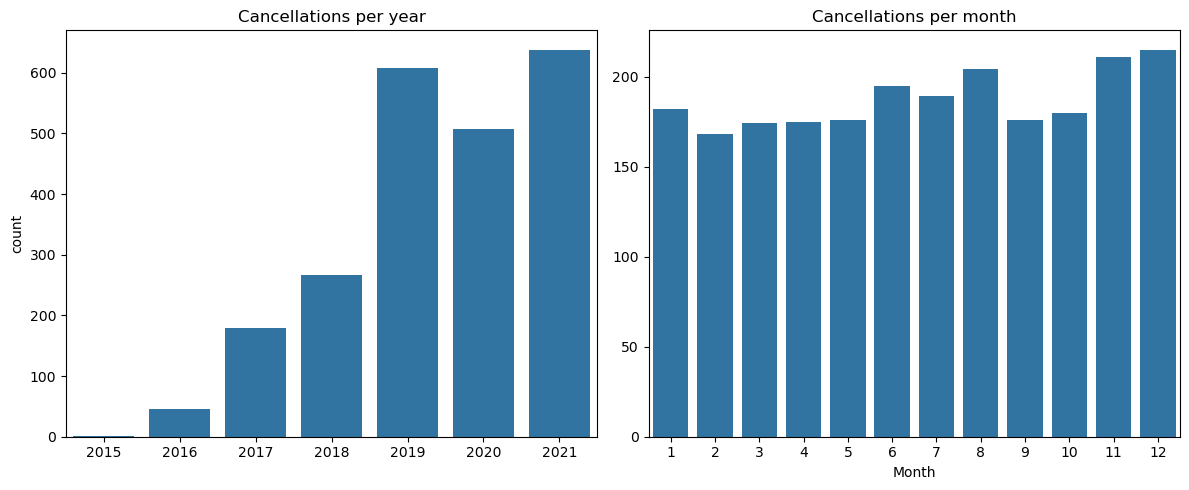

In [37]:

valid_dates = customer["CancellationDate"].dt.year != 1904


plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(x=customer.loc[valid_dates, "CancellationDate"].dt.year.astype(int).sort_values())
plt.title("Cancellations per year")
plt.xlabel("")

plt.subplot(1,2,2)
sns.countplot(x=customer.loc[valid_dates, "CancellationDate"].dt.month.astype(int))
plt.title("Cancellations per month")
plt.xlabel("Month")
plt.ylabel("")
plt.tight_layout()

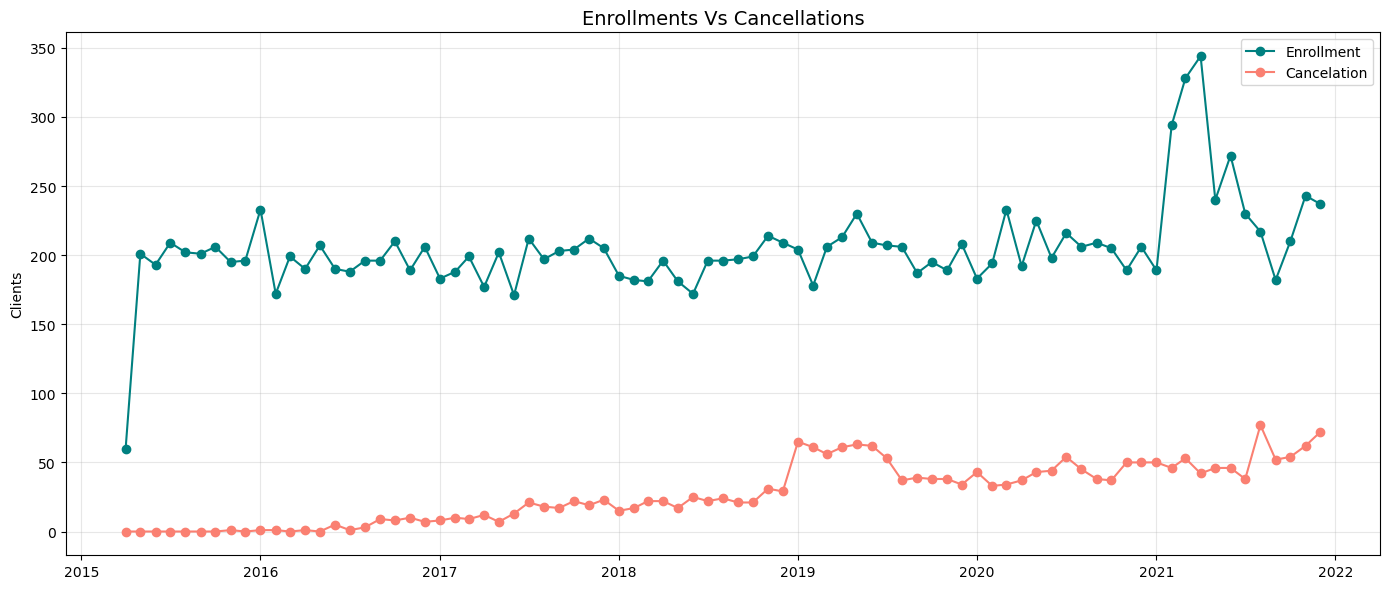

In [38]:
monthly_enroll = customer.groupby(customer["EnrollmentDateOpening"].dt.to_period("M")).size()
monthly_cancel = customer.loc[valid_dates].groupby(customer.loc[valid_dates, "CancellationDate"].dt.to_period("M")).size()

# Criar range completo de meses para alinhar as séries
all_months = pd.period_range(
    start=min(monthly_enroll.index.min(), monthly_cancel.index.min()),
    end=max(monthly_enroll.index.max(), monthly_cancel.index.max()),
    freq="M"
)

# Reindexar para garantir continuidade
monthly_enroll = monthly_enroll.reindex(all_months, fill_value=0)
monthly_cancel = monthly_cancel.reindex(all_months, fill_value=0)

# Converter PeriodIndex em datetime (para eixo legível)
monthly_enroll.index = monthly_enroll.index.to_timestamp()
monthly_cancel.index = monthly_cancel.index.to_timestamp()

plt.figure(figsize=(14,6))
plt.plot(monthly_enroll.index, monthly_enroll, marker='o', label="Enrollment", color='teal')
plt.plot(monthly_cancel.index, monthly_cancel, marker='o', label="Cancelation", color='salmon')
plt.title("Enrollments Vs Cancellations", fontsize=14)
plt.xlabel("")
plt.ylabel("Clients")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


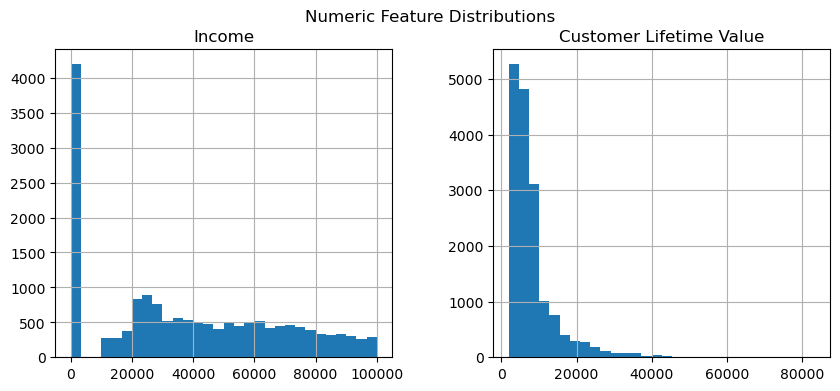

In [39]:
numeric_customer = ["Income", "Customer Lifetime Value"]
customer[numeric_customer].hist(bins=30 ,figsize=(10,4))
plt.suptitle("Numeric Feature Distributions")
plt.show()


The distributions of Income and Customer Lifetime Value are highly right-skewed, with the vast majority of customers concentrated at low values. The presence of a long tail suggests potential high-value customers, but these instances should be investigated to determine if they represent a genuine business segment (e.g., corporate clients) or data outliers.


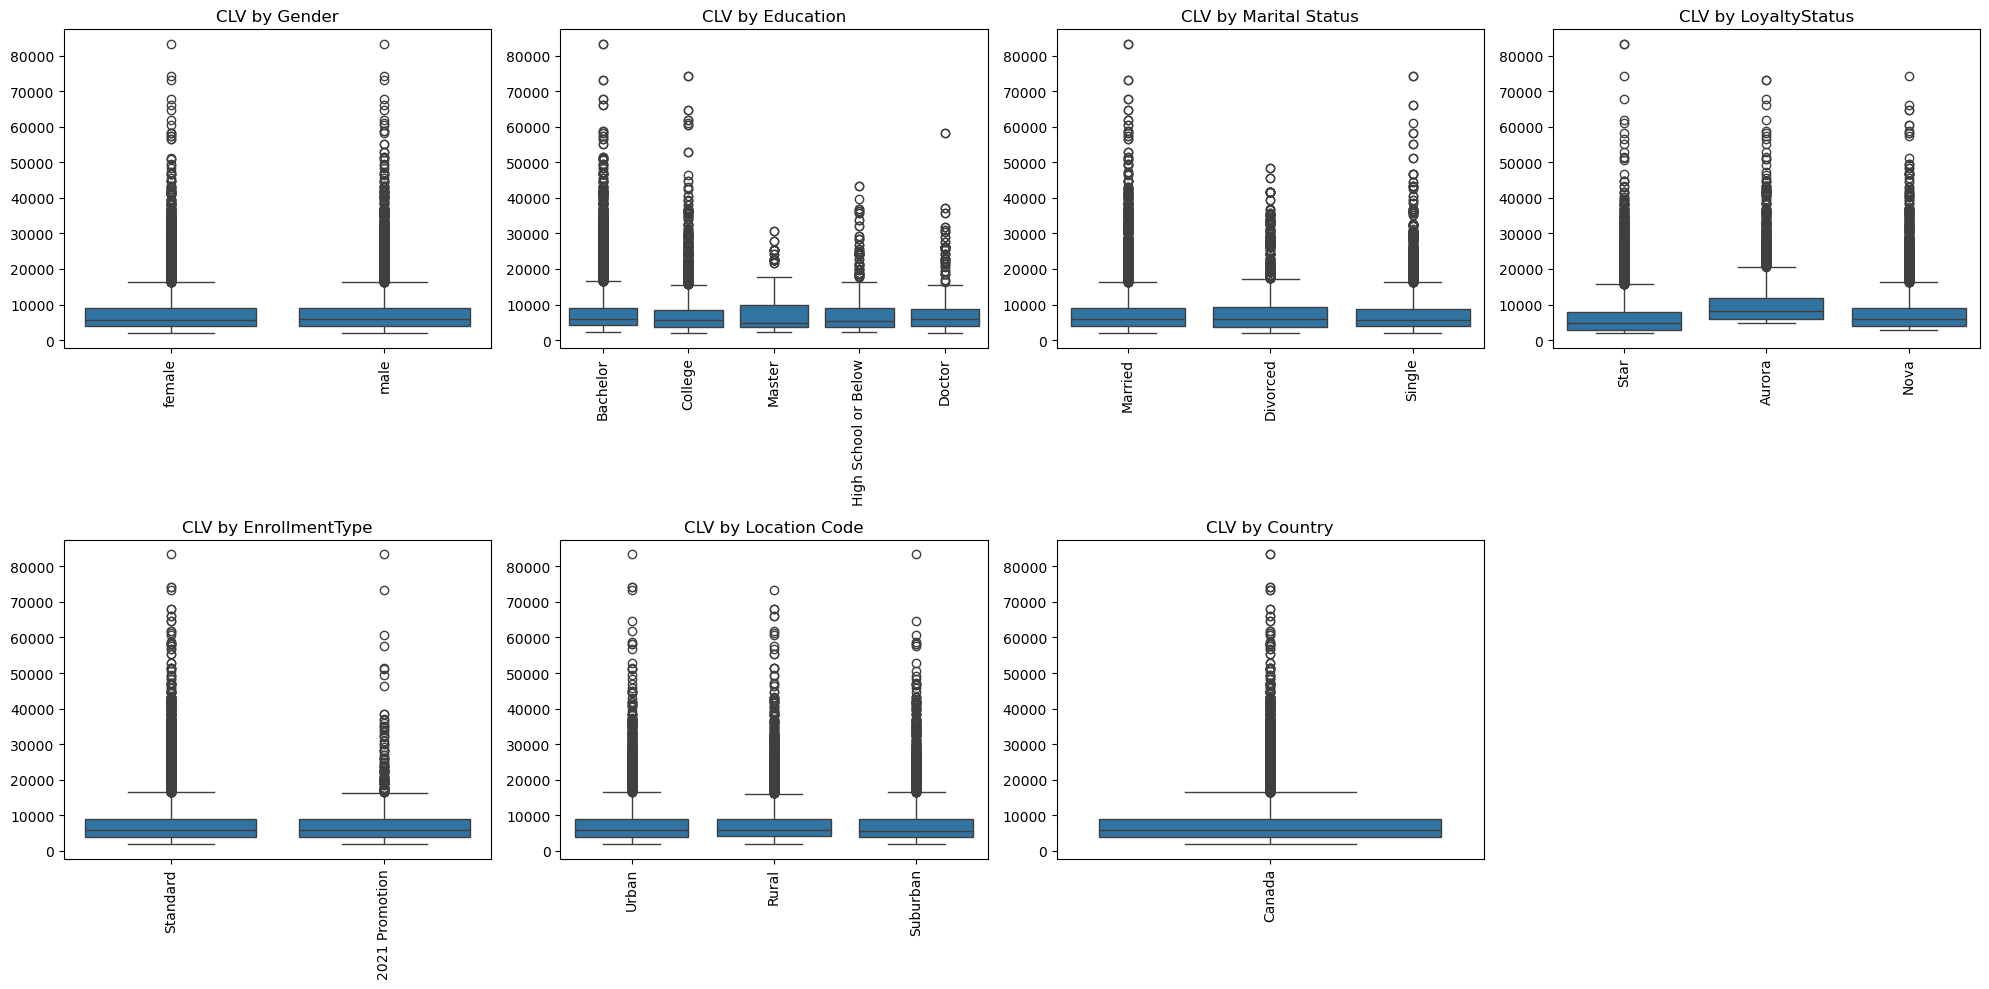

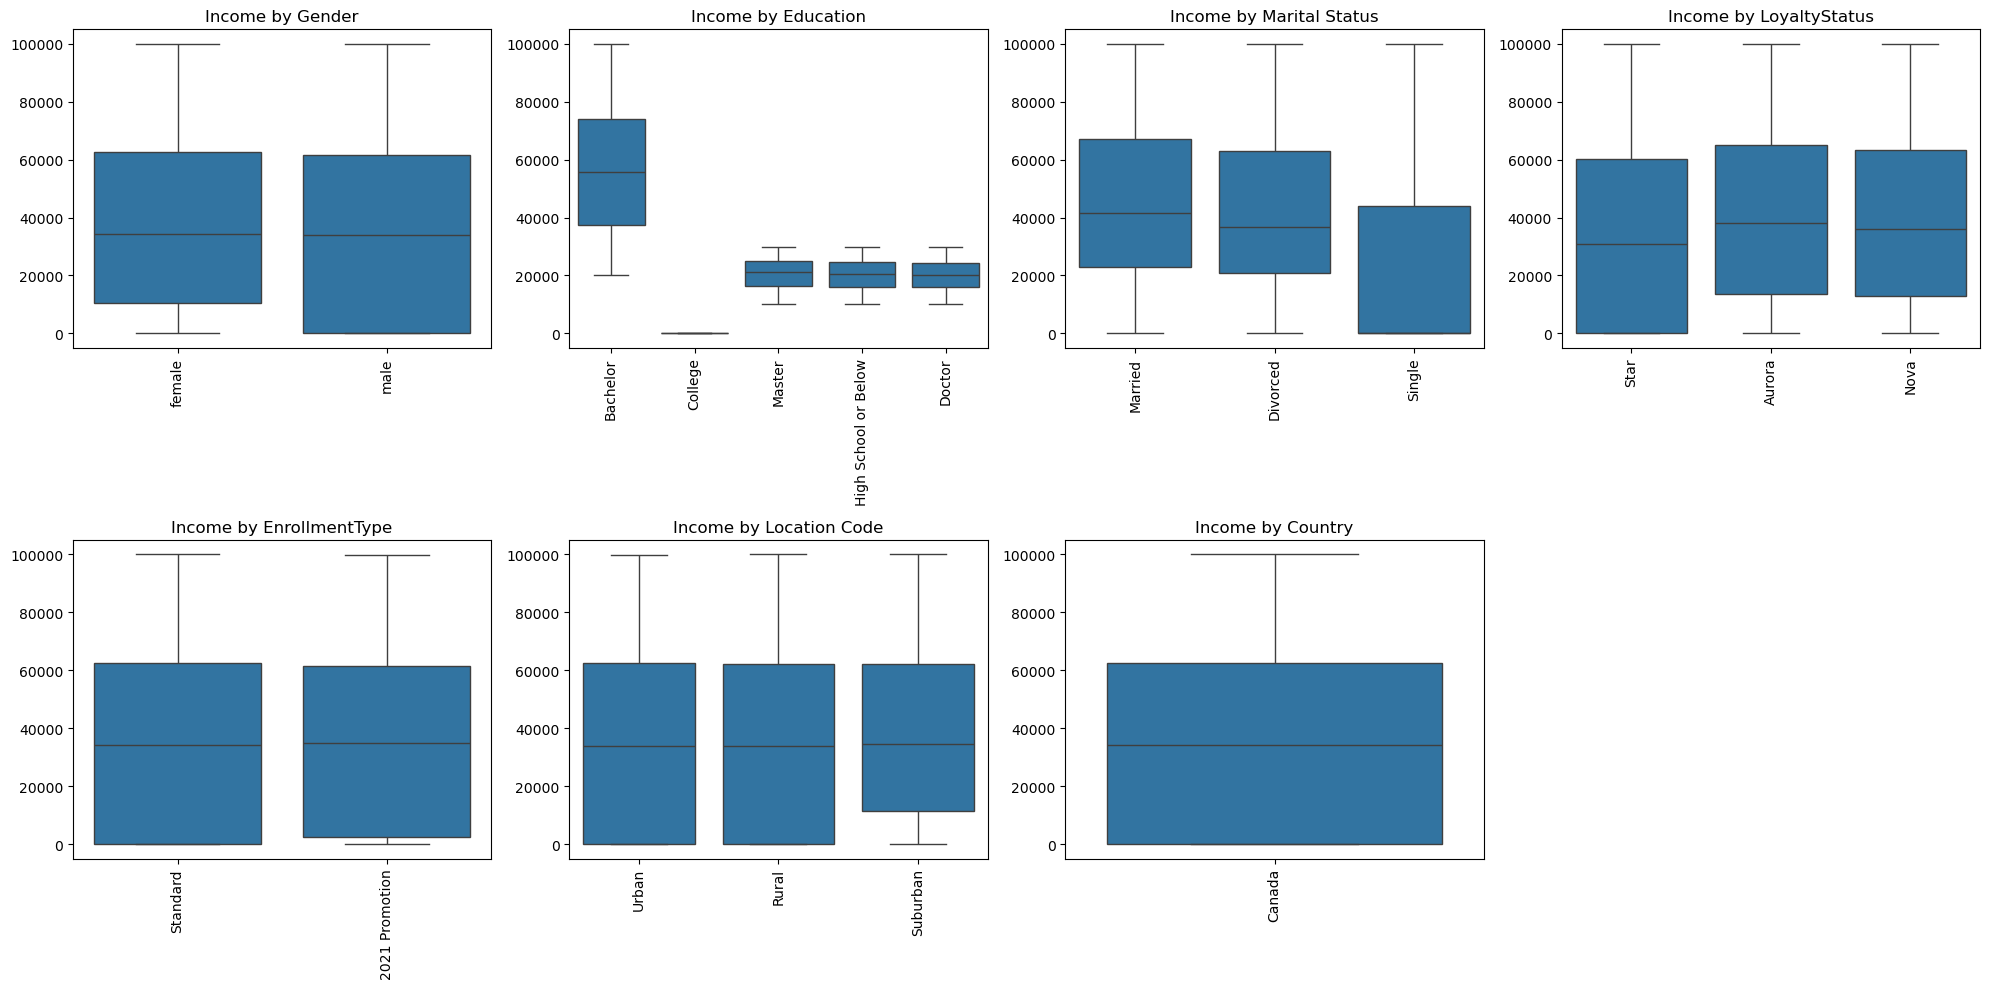

In [40]:
plt.figure(figsize=(20, 10))
for i, cat_col in enumerate(categorical_customer, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x=cat_col, y="Customer Lifetime Value", data=customer)
    plt.title(f"CLV by {cat_col}")
    plt.xlabel("")
    plt.ylabel("")
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

plt.figure(figsize=(20, 10))
for i, cat_col in enumerate(categorical_customer, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x=cat_col, y="Income", data=customer)
    plt.title(f"Income by {cat_col}")
    plt.xlabel("")
    plt.ylabel("")
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [41]:
def find_group_outliers(df, group_col, value_col, k=1.5):
    outlier_idx = []
    for name, g in df.groupby(group_col):
        q1 = g[value_col].quantile(0.25)
        q3 = g[value_col].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - k * iqr
        upper = q3 + k * iqr
        mask = (g[value_col] < lower) | (g[value_col] > upper)
        outlier_idx.extend(g[mask].index.tolist())
    return df.loc[outlier_idx]

def outliers_for_all(df, cat_cols, value_cols=("Customer Lifetime Value", "Income"), k=1.5):
    results = {}
    for val in value_cols:
        print(f"\n--- {val} ---")
        # compute outliers per categorical column
        for col in cat_cols:
            out = find_group_outliers(df, col, val, k=k)
            results[(col, val)] = out
            print(f"{col}: {len(out)} outliers")
    return results

outliers_dict = outliers_for_all(customer, categorical_customer)



--- Customer Lifetime Value ---
Gender: 1463 outliers
Education: 1477 outliers
Marital Status: 1446 outliers
LoyaltyStatus: 1355 outliers
EnrollmentType: 1460 outliers
Location Code: 1445 outliers
Country: 1460 outliers

--- Income ---
Gender: 0 outliers
Education: 0 outliers
Marital Status: 0 outliers
LoyaltyStatus: 0 outliers
EnrollmentType: 0 outliers
Location Code: 0 outliers
Country: 0 outliers


### Income Distribution by Loyalty Status
The median Income is similar but slightly lower for the Star loyalty group compared to Aurora and Nova. However, the overall distribution and range of Income across all three groups are highly consistent, with the Interquartile Ranges (IQR) and whiskers spanning similar values (from approximately $0 to $100,000). This suggests that Loyalty Status is not a strong differentiator of customer income levels.

### Customer liftime value by Loyalty Status
The plot shows that high-CLV customers (outliers) are not segregated within a single, premium loyalty status; they are present across all three loyalty statuses (Star, Aurora, and Nova). While the Aurora tier shows a slightly higher median CLV, the overall pattern suggests that Loyalty Status is a poor predictor of a customer's lifetime value.

### Income Distribution by Education Level
The analysis reveals that a Bachelor's degree is the dominant factor determining high customer income, with this group showing a significantly higher median and broader Interquartile Range (IQR) than all others. In contrast, Master's, High School, and Doctor levels show consistently low and similar median incomes. Crucially, the College category displays a median income of zero, pointing to a severe data quality issue (missing or improperly coded income values) that must be addressed prior to any predictive modeling.

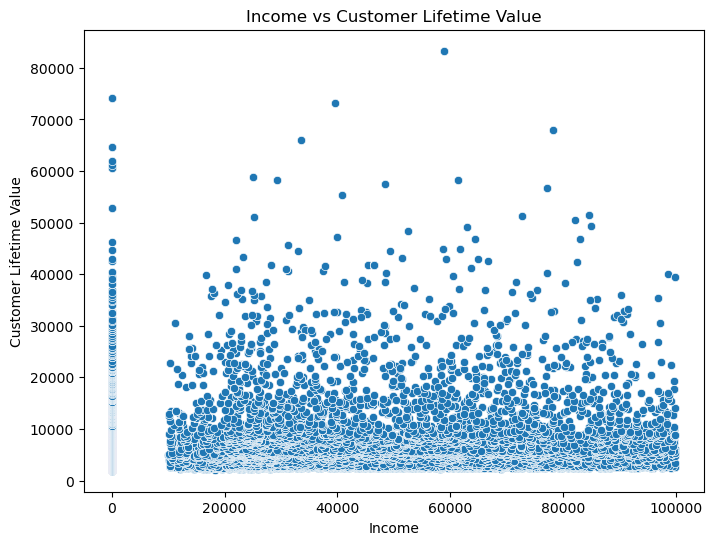

In [42]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Income', y='Customer Lifetime Value', data=customer)
plt.title('Income vs Customer Lifetime Value')
plt.show()

The scatter plot confirms that there is no strong linear correlation between Income and Customer Lifetime Value (CLV). High-CLV customers (the upper outliers) are observed across the entire income spectrum, demonstrating that a customer's purchasing power is not the primary driver of their long-term value. This suggests that predictive models should prioritize behavioral features over income.

#### Flights Insights 

In [43]:
flight.describe().T

count                           mean  \
Loyalty#                  596664.0                  549435.680825   
Year                      596664.0                         2020.0   
Month                     596664.0                            6.5   
YearMonthDate               596664  2020-06-16 02:40:00.000000768   
NumFlights                596664.0                       3.845372   
NumFlightsWithCompanions  596664.0                       0.936168   
DistanceKM                596664.0                    7973.603444   
PointsAccumulated         596664.0                     797.122897   
PointsRedeemed            596664.0                     236.461457   
DollarCostPointsRedeemed  596664.0                       2.336869   

                                          min                  25%  \
Loyalty#                             100018.0             326234.0   
Year                                   2019.0               2019.0   
Month                                     1.0                 3.75   
YearMonthDate             2019-01-01 00:00:00  2019-09-23 12:00:00   
NumFlights                                0.0                  0.0   
NumFlightsWithCompanions                  0.0                  0.0   
DistanceKM                                0.0                  0.0   
PointsAccumulated                         0.0                  0.0   
PointsRedeemed                            0.0                  0.0   
DollarCostPointsRedeemed                  0.0                  0.0   

                                          50%                  75%  \
Loyalty#                             550020.0             771901.0   
Year                                   2020.0               2021.0   
Month                                     6.5                 9.25   
YearMonthDate             2020-06-16 00:00:00  2021-03-08 18:00:00   
NumFlights                                0.0                  7.0   
NumFlightsWithCompanions                  0.0                  1.0   
DistanceKM                              984.5              15400.0   
PointsAccumulated                        98.0               1540.0   
PointsRedeemed                            0.0                  0.0   
DollarCostPointsRedeemed                  0.0                  0.0   

                                          max            std  
Loyalty#                             999986.0  258867.195581  
Year                                   2021.0       0.816497  
Month                                    12.0       3.452055  
YearMonthDate             2021-12-01 00:00:00            NaN  
NumFlights                               21.0       5.022941  
NumFlightsWithCompanions                 11.0       1.968412  
DistanceKM                            42040.0   10269.174348  
PointsAccumulated                      4204.0    1026.742807  
PointsRedeemed                         7496.0     985.650609  
DollarCostPointsRedeemed                 74.0       9.749377

### Univariate analysis


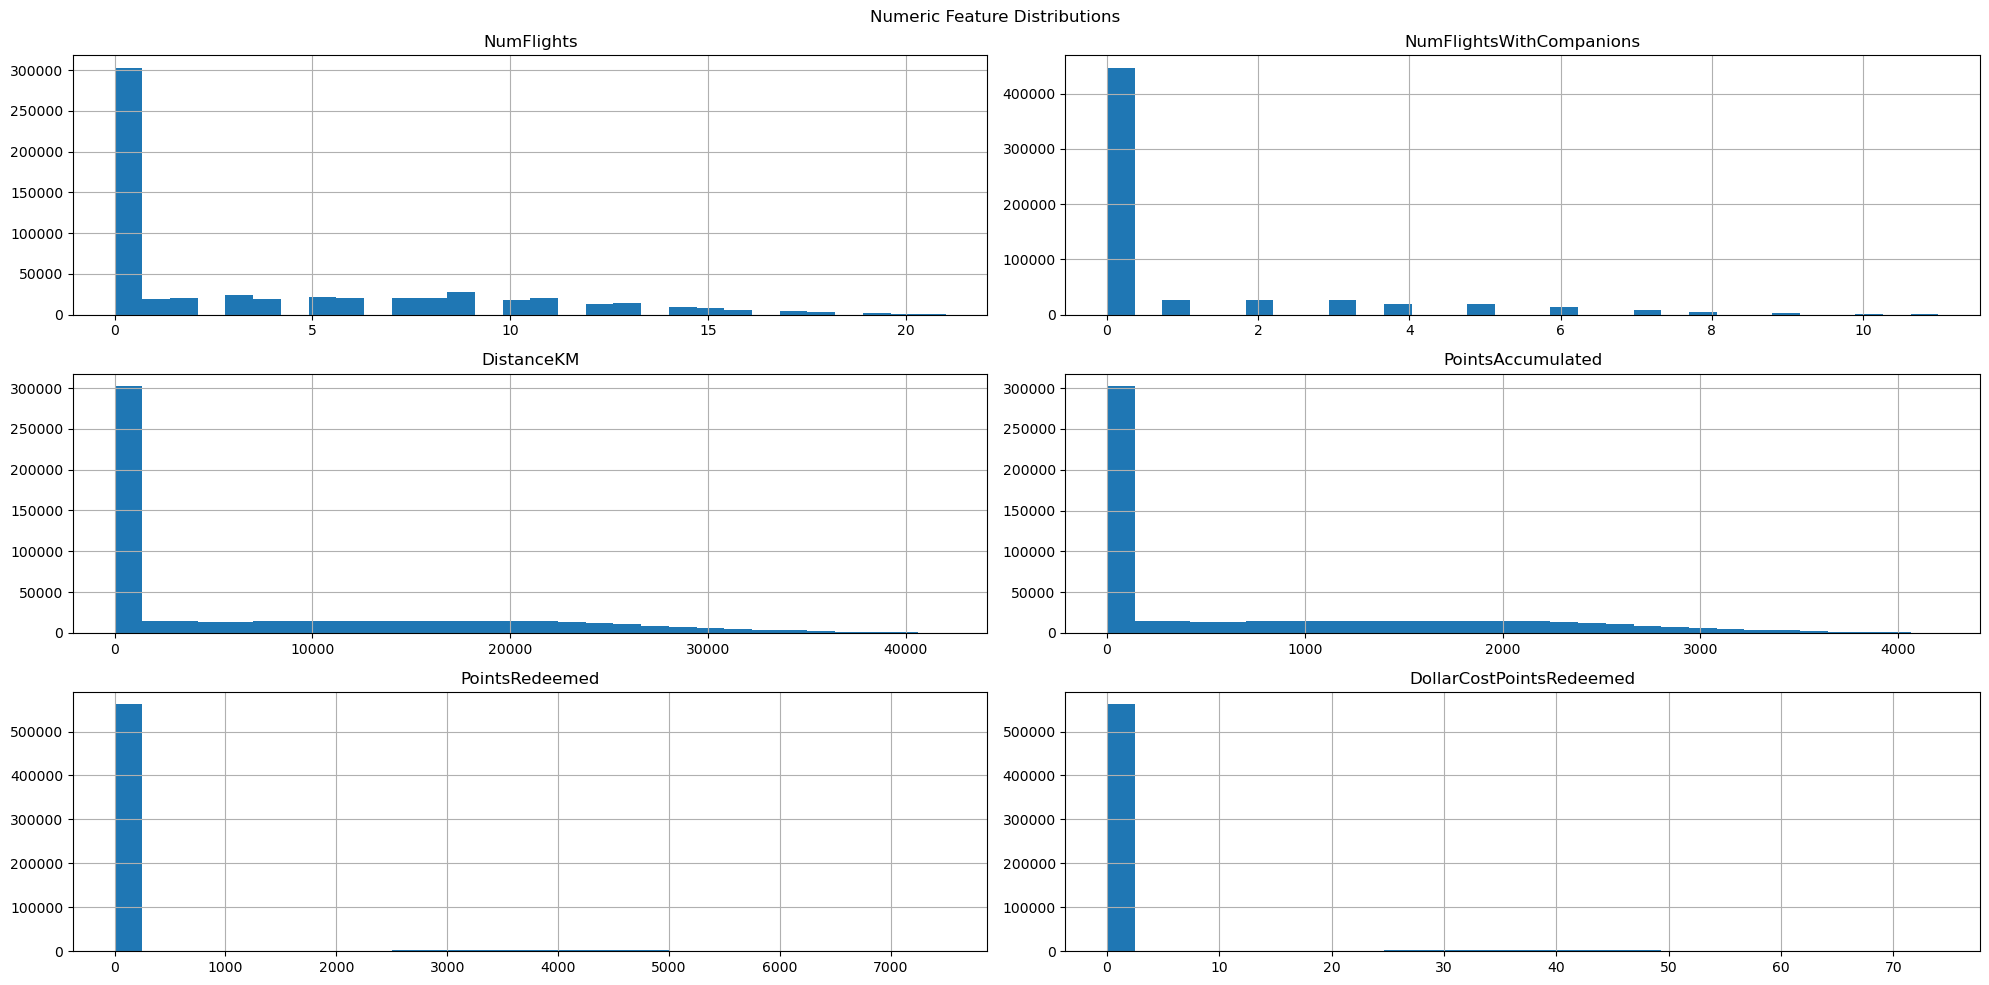

Número de outliers por variável:
NumFlights                   6814
NumFlightsWithCompanions    95880
DistanceKM                   1828
PointsAccumulated            1821
PointsRedeemed              34884
DollarCostPointsRedeemed    34884
dtype: int64


In [44]:
numeric_flights = ["NumFlights", "NumFlightsWithCompanions", "DistanceKM", "PointsAccumulated", "PointsRedeemed", "DollarCostPointsRedeemed"]

# Histograms
flight[numeric_flights].hist(bins=30, figsize=(20, 10))
plt.suptitle("Numeric Feature Distributions")
plt.tight_layout()
plt.show()

# Identificar outliers usando IQR
Q1 = flight[numeric_flights].quantile(0.25)
Q3 = flight[numeric_flights].quantile(0.75)
IQR = Q3 - Q1

outliers = ((flight[numeric_flights] < (Q1 - 1.5 * IQR)) | (flight[numeric_flights] > (Q3 + 1.5 * IQR))).sum()
print("Número de outliers por variável:")
print(outliers)

### Multivariate analysis


In [45]:
flight.groupby(["Year", "Month"])["NumFlights"].sum()

Year  Month
2019  1         38645
      2         38753
      3         52952
      4         45638
      5         53729
      6         67803
      7         75705
      8         65973
      9         51971
      10        48921
      11        45897
      12        64287
2020  1         47266
      2         47102
      3         63398
      4         55080
      5         64345
      6         79345
      7         88023
      8         77554
      9         62370
      10        59427
      11        56036
      12        76462
2021  1         48422
      2         47841
      3         65889
      4         55915
      5         75675
      6         91401
      7        102553
      8         89049
      9         71788
      10        67916
      11        64310
      12        86954
Name: NumFlights, dtype: int64

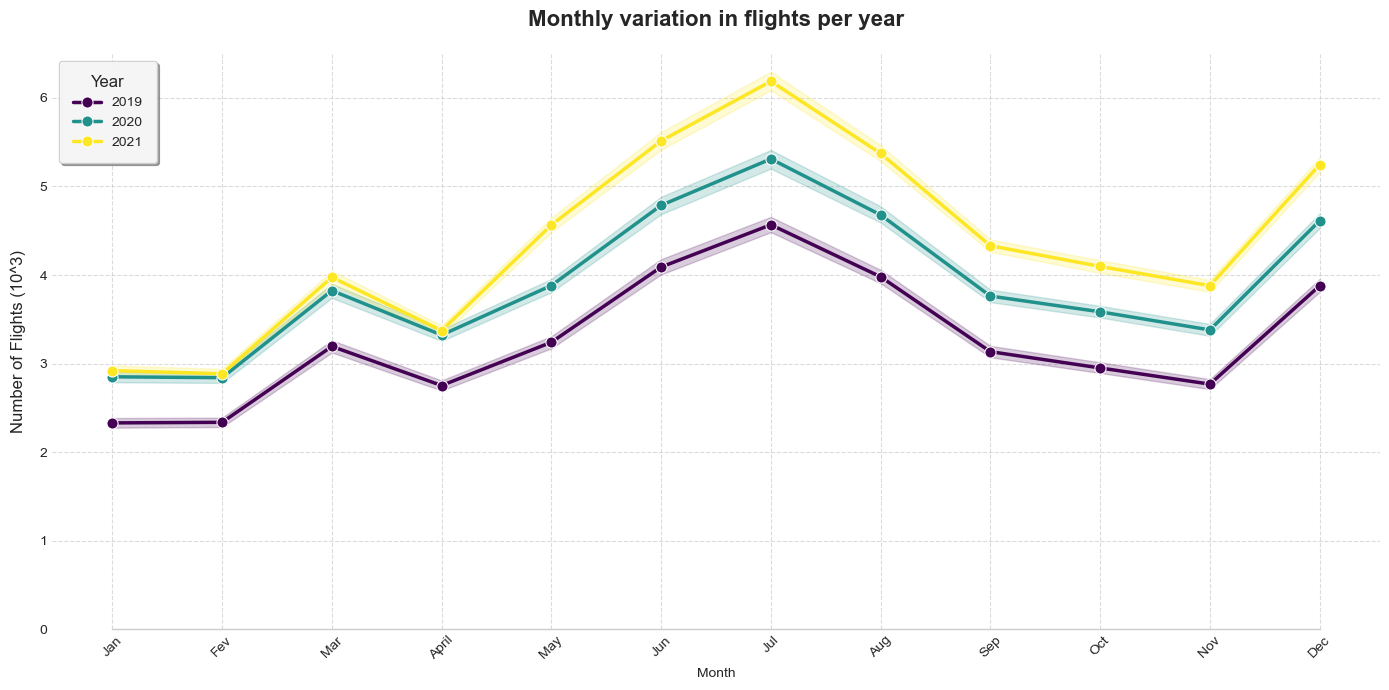

In [46]:
# Choosing the style 
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(14, 7))

# Create the graph
ax = sns.lineplot(
        data=flight,
        x="Month",
        y="NumFlights",
        hue="Year",
        palette="viridis",  # Color scheme
        linewidth=2.5,
        marker='o',         # Add markers
        markersize=8     
    )

# Melhorando os títulos e rótulos
plt.title("Monthly variation in flights per year",
            fontsize=16,
            fontweight='bold',
            pad=20)
plt.ylabel('Number of Flights (10^3)', fontsize=12, labelpad=10)

# Create a legend
plt.legend(
        title='Year',
        title_fontsize=12,
        fontsize=10,
        frameon=True,
        fancybox=True,
        framealpha=0.9,
        shadow=True,
        borderpad=1
)

# Ajustando os eixos
plt.xticks(range(1, 13),
           ['Jan', 'Fev', 'Mar', 'April', 'May', 'Jun',
            'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
           rotation=45)
plt.ylim(0)

    # Adicionando grid
plt.grid(True, linestyle='--', alpha=0.7)

    # Ajustando as bordas
sns.despine(trim=True, left=True)

    # Ajustando o layout
plt.tight_layout()

    # Mostrando o gráfico
plt.show()

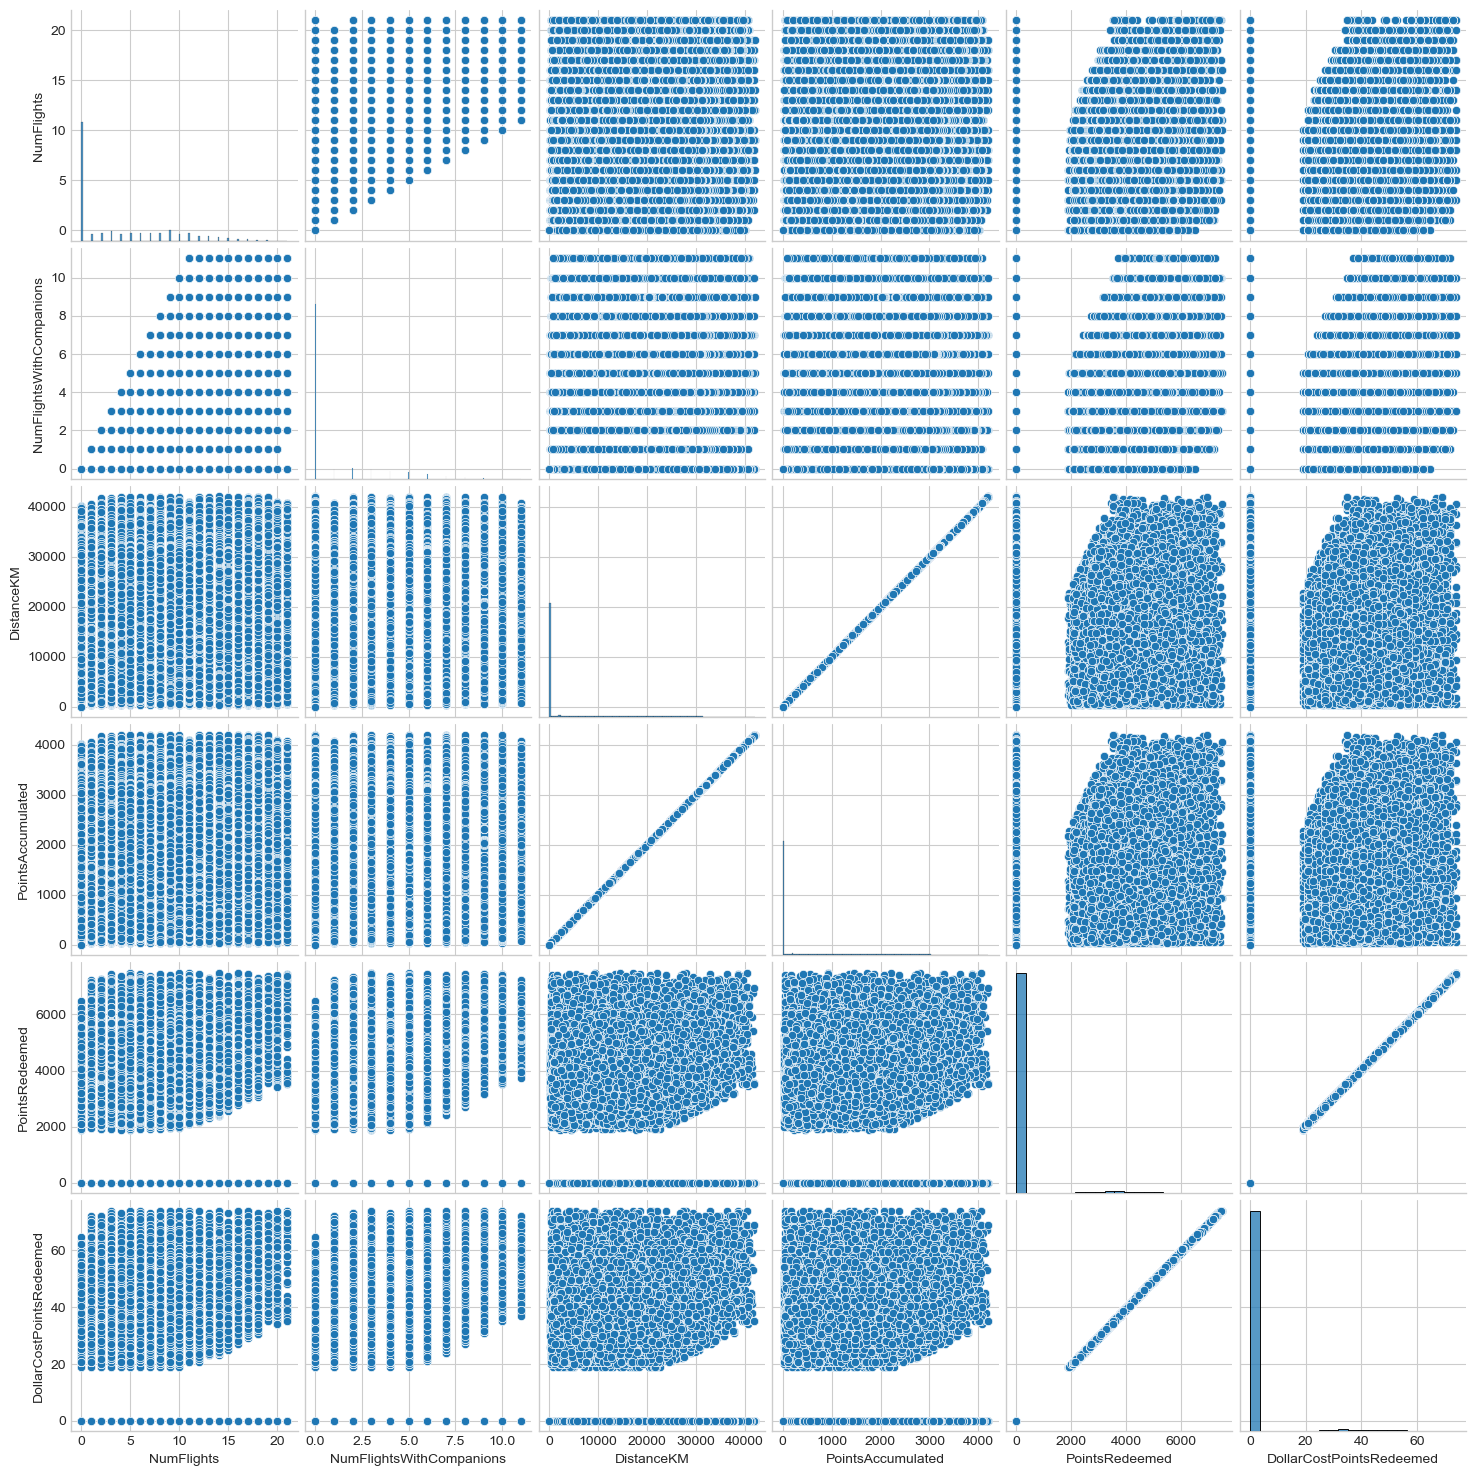

In [47]:
sns.pairplot(data=flight, vars= numeric_flights)

plt.show()

During the exploration, several features were found to have strong linear relationships. These are not coincidental correlations but rather indicators of specific business rules used by the airline.

A strong positive correlation was observed between DistanceKM and PointsAccumulated. This is expected, as it reflects the loyalty program's core mechanic: customers earn points based on the distance they fly.

However, the analysis revealed a more precise calculation. The data shows that the number of points awarded is based on a fixed ratio. For example, flights of 2,388 km and 2,380 km both yield 238 points. This strongly suggests that the business rule is PointsAccumulated = floor(DistanceKM / 10).

This means that points are awarded for every full 10 kilometers flown, and any remaining unit-level distance is truncated. Understanding this specific rule is key, as it explains the exact, predictable nature of how points are earned.

Similarly, the strong correlation between PointsRedeemed and DollarCostPointsRedeemed points to a derived relationship, not a behavioral one.

The DollarCostPointsRedeemed is likely an internal accounting metric. It is almost certainly calculated by multiplying the PointsRedeemed by a fixed monetary rate (a "cost-per-point") that the airline uses to track the financial liability of its loyalty program. This makes one variable a direct linear function of the other, explaining the perfect or near-perfect correlation.

The heatmap below comprove the things that we observed

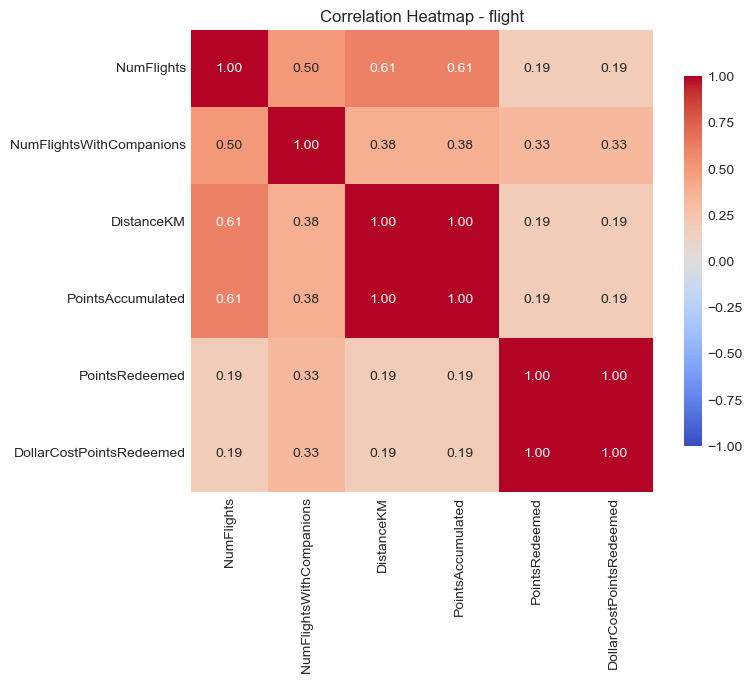

In [48]:

correlation_matrix = flight[numeric_flights].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, 
            annot=True,           # Mostrar valores dentro dos quadrados
            cmap='coolwarm',      # Esquema de cores (azul-vermelho)
            vmin=-1, vmax=1,      # Limites da escala de correlação
            center=0,             # Centralizar em 0
            square=True,          # Quadrados em vez de retângulos
            fmt='.2f',            # Formato com 2 casas decimais
            cbar_kws={'shrink': 0.8})  # Tamanho da barra de cores

plt.title("Correlation Heatmap - flight")
plt.show()
plt.show()

### customer and flight

In [49]:
merged = pd.merge(customer, flight, on='Loyalty#', how='inner')
agg = merged.groupby('Loyalty#', as_index=False).agg({
    'NumFlights': 'sum',
    'DistanceKM': 'sum',
    'PointsAccumulated': 'sum',
    'PointsRedeemed': 'sum',
    'DollarCostPointsRedeemed': 'sum',
    'Customer Lifetime Value': 'mean',
    'Income': 'first',
    'LoyaltyStatus': 'first',
    'Gender': 'first',
    'Education': 'first',
})

KeyboardInterrupt: 

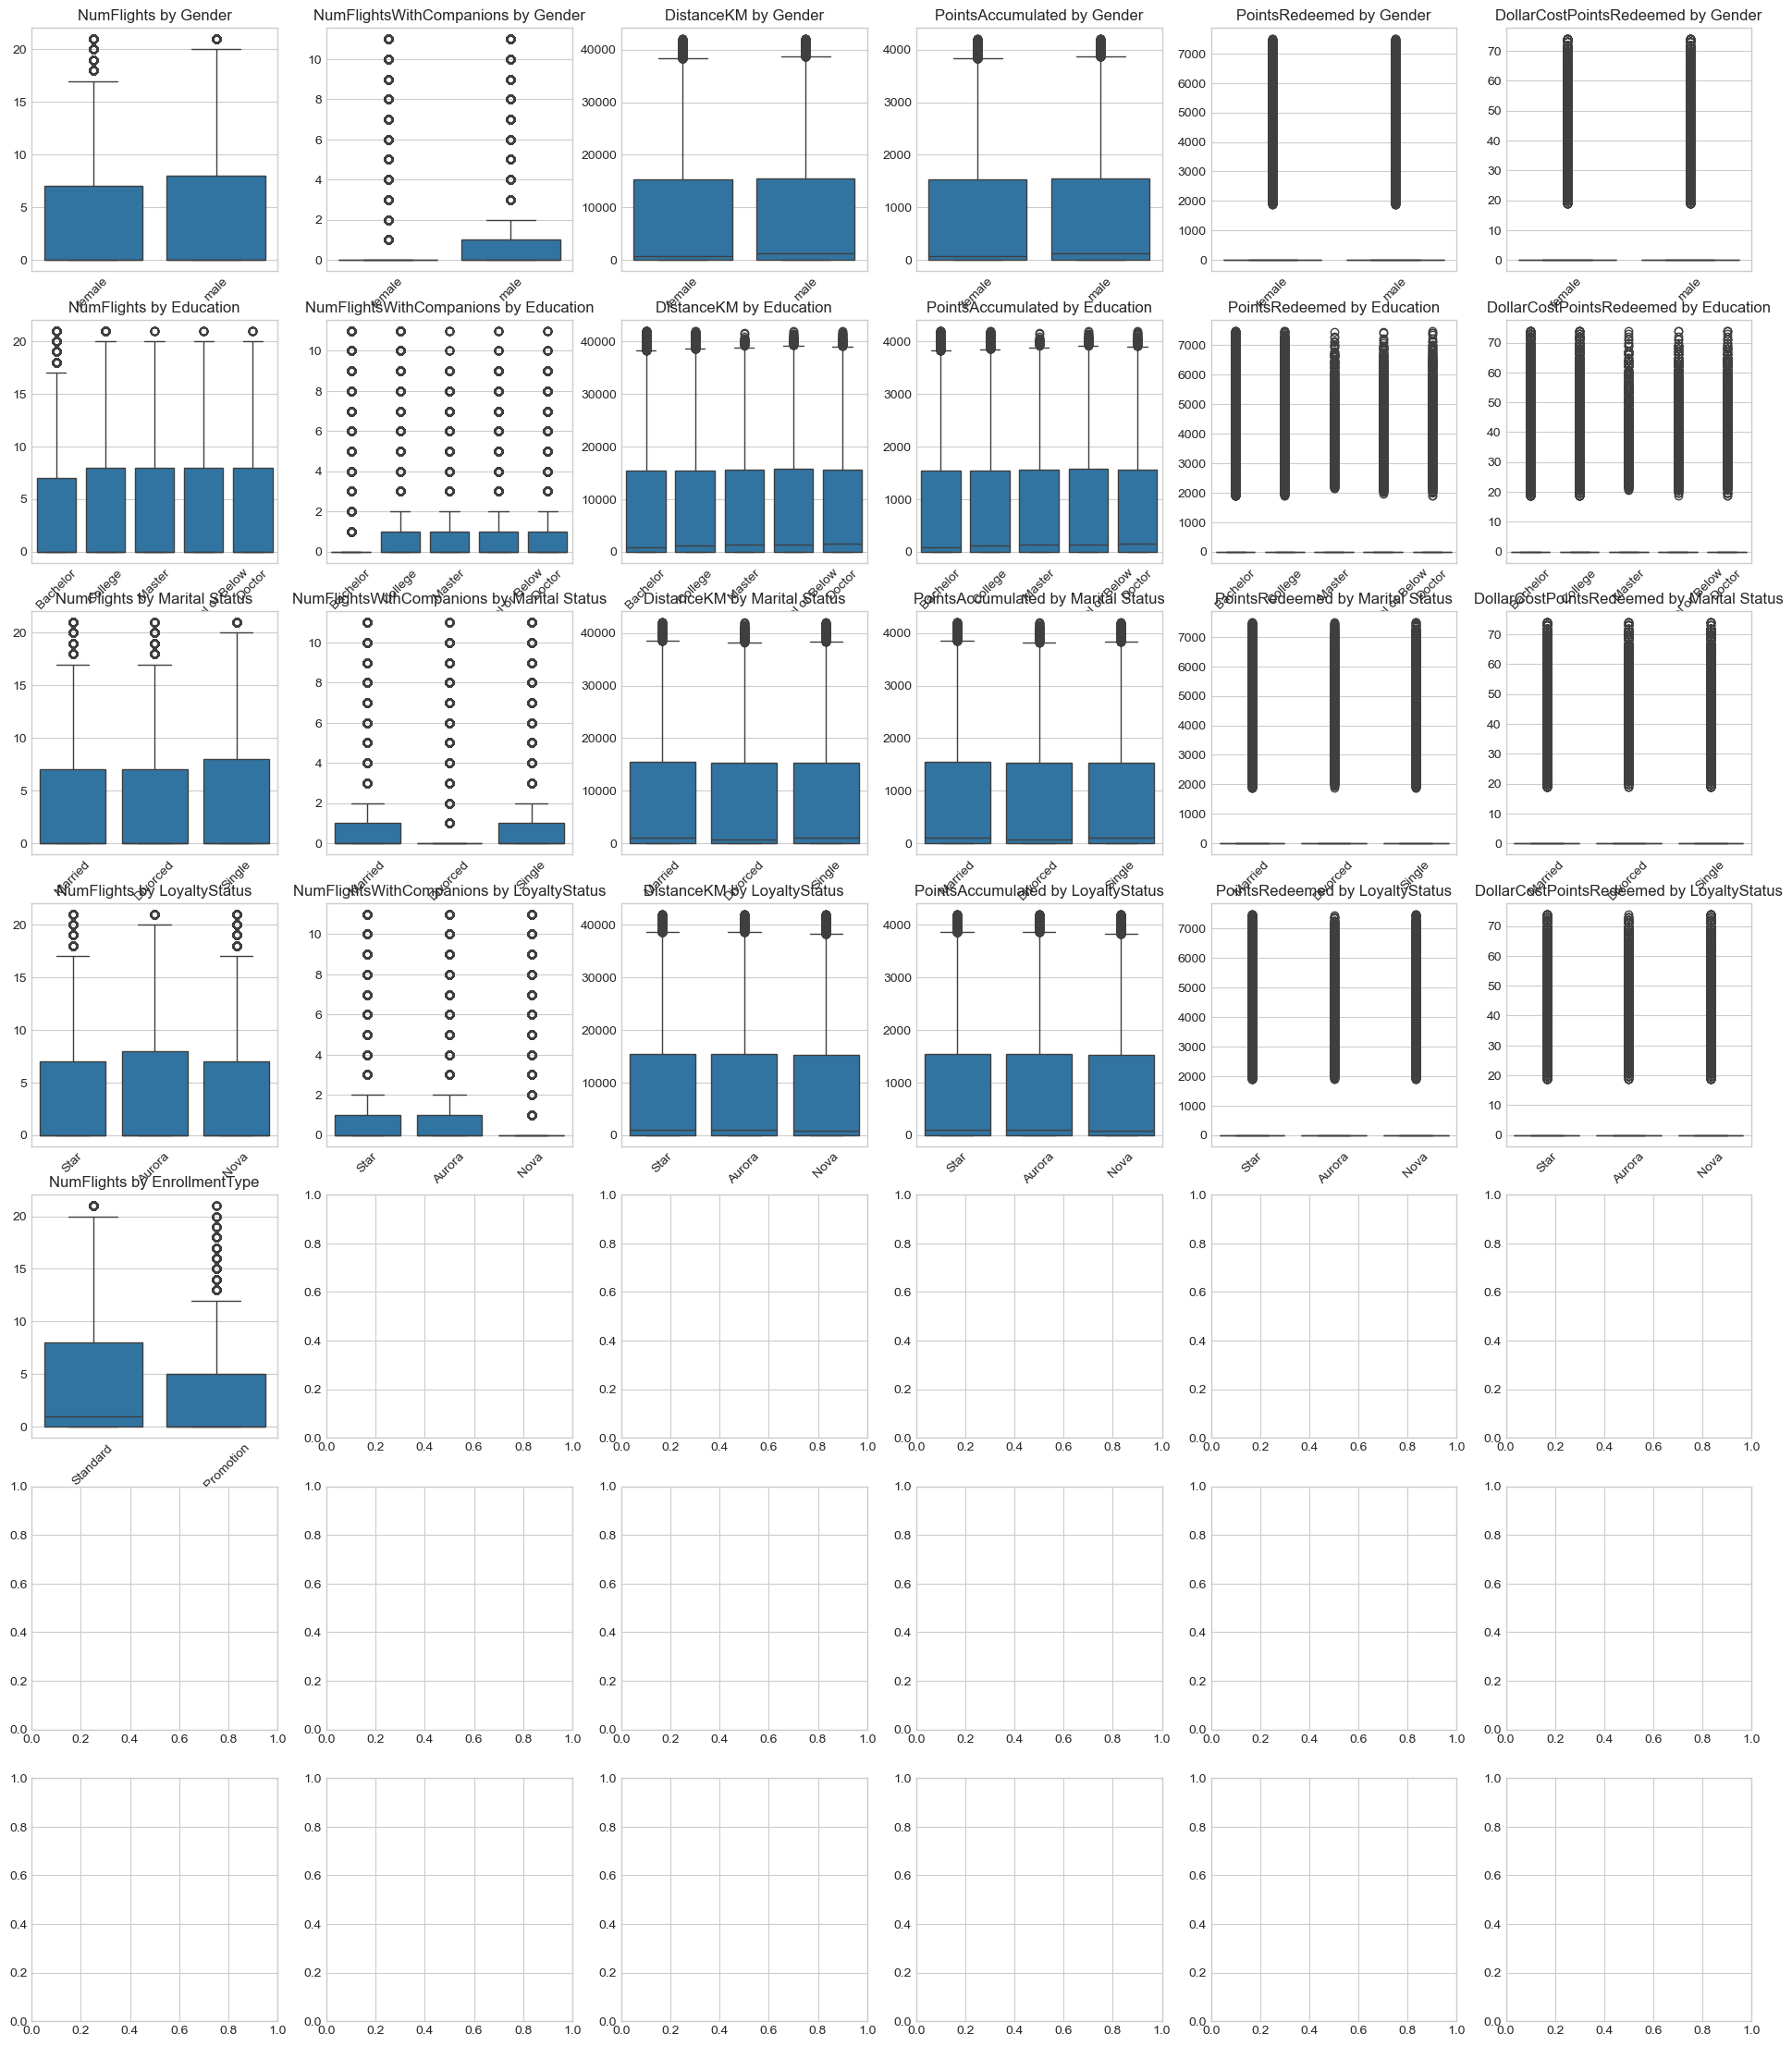

In [50]:
n_rows = len(categorical_customer)
n_cols = len(numeric_flights)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(4*n_cols, 4*n_rows))

for i, cat in enumerate(categorical_customer):
    for j, num in enumerate(numeric_flights):
        ax = axes[i, j]
        sns.boxplot(x=cat, y=num, data=merged, ax=ax)
        ax.set_title(f'{num} by {cat}')
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

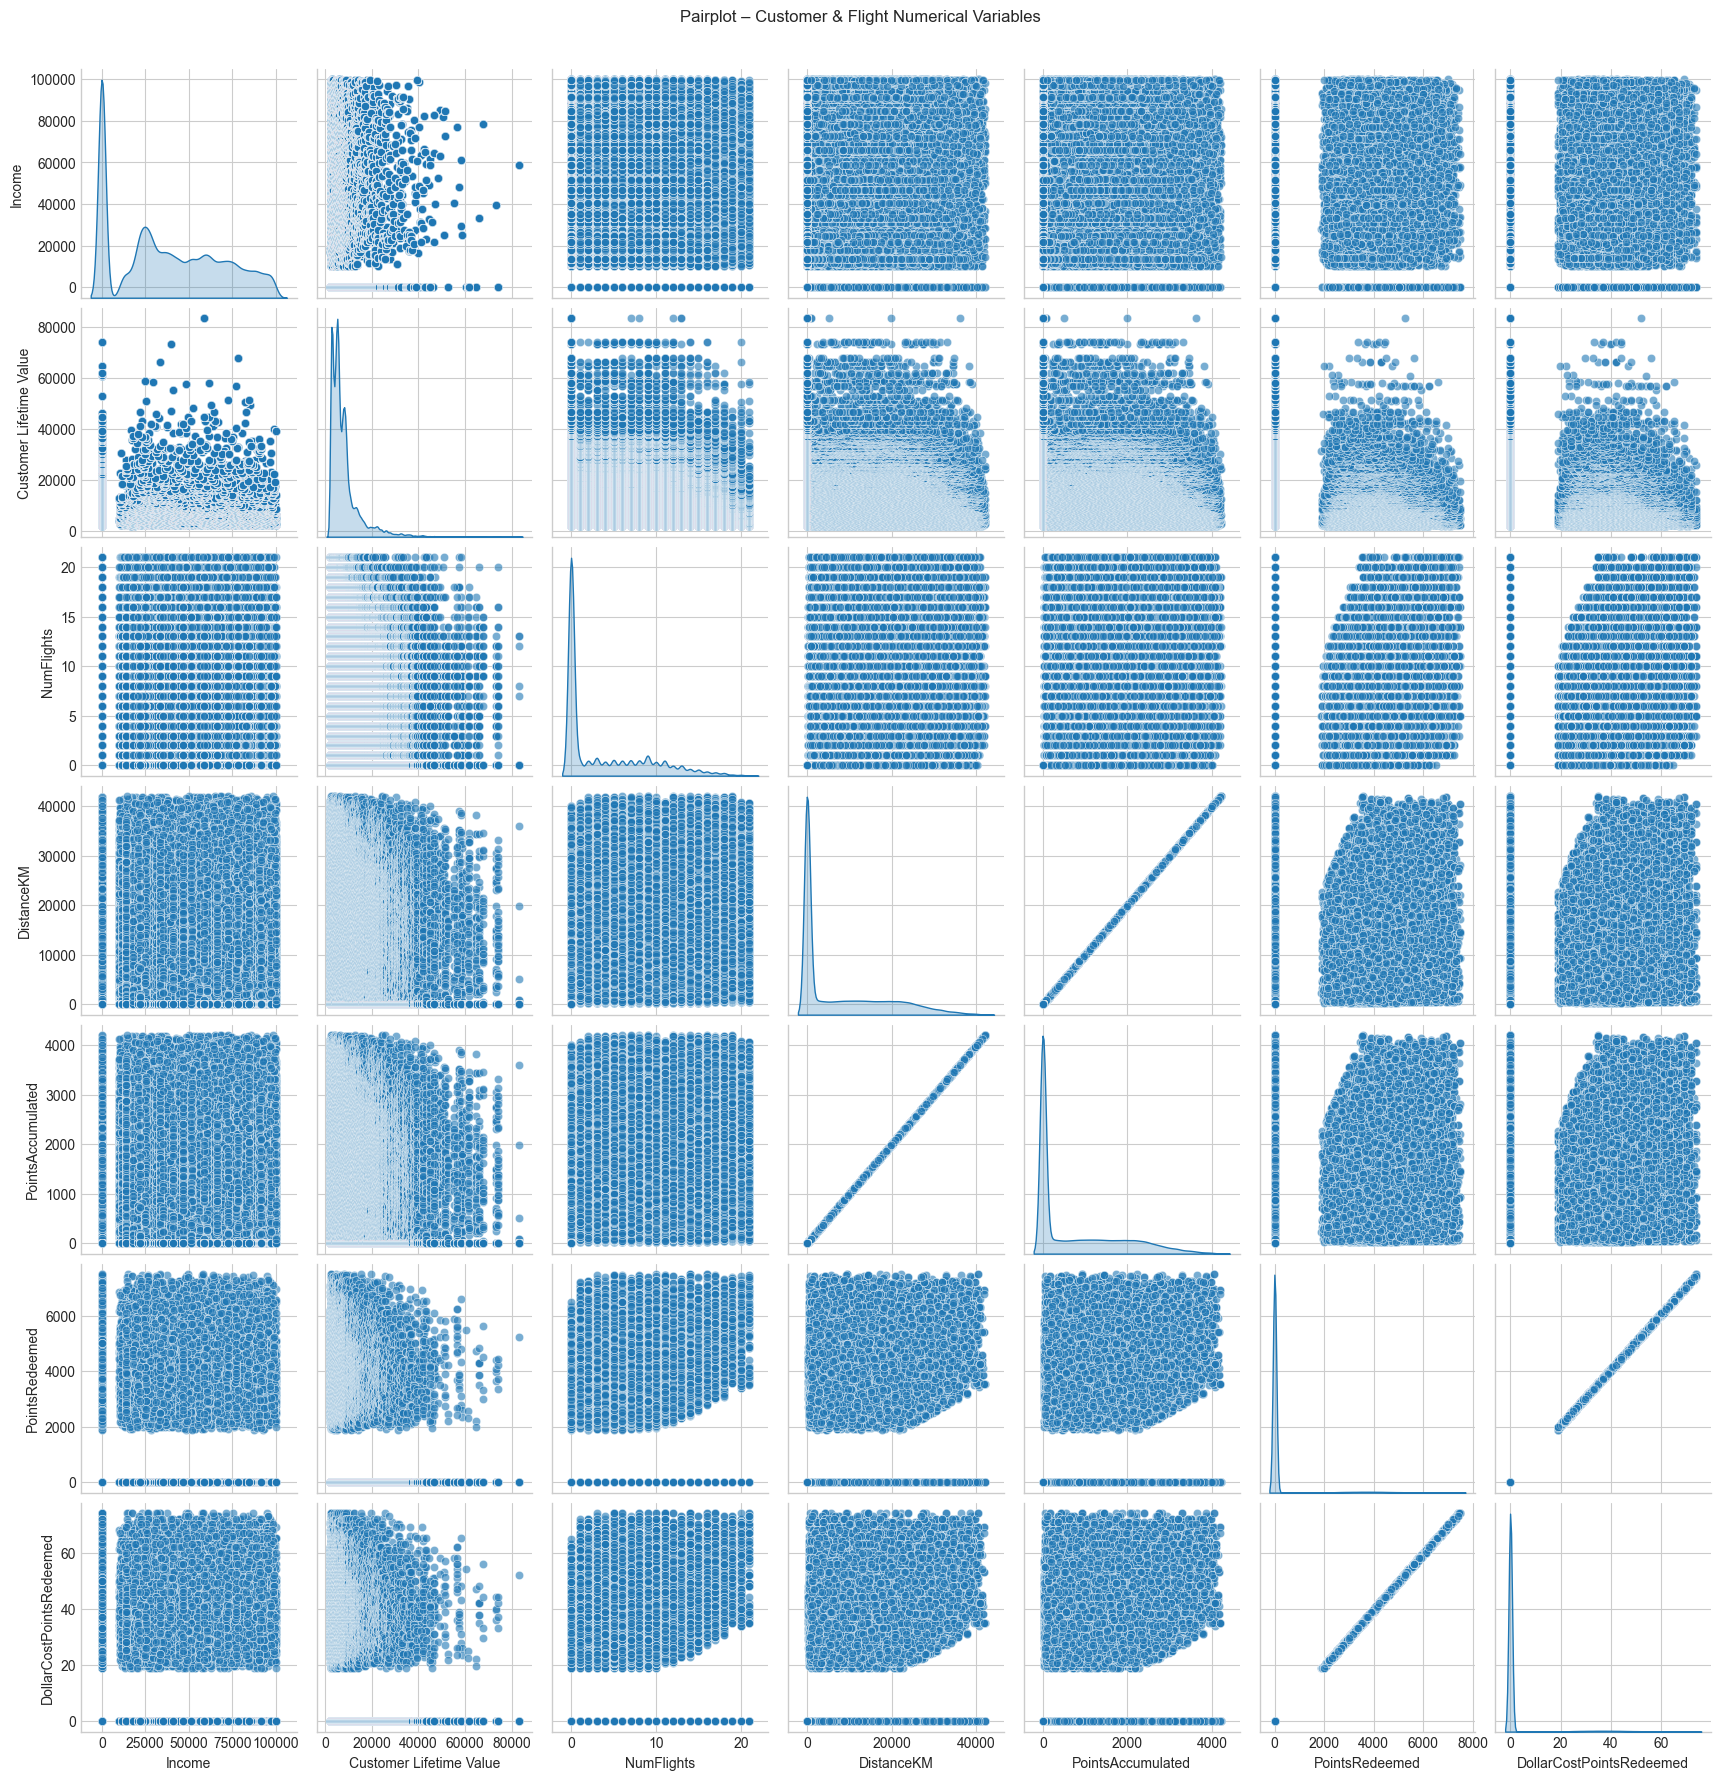

In [ ]:
pairplot_vars = [
    'Income', 'Customer Lifetime Value', 
    'NumFlights', 'DistanceKM', 'PointsAccumulated',
    'PointsRedeemed', 'DollarCostPointsRedeemed'
]

sns.pairplot(merged[pairplot_vars], diag_kind='kde', plot_kws={'alpha':0.6})
plt.suptitle('Pairplot – Customer & Flight Numerical Variables', y=1.02)
plt.show()


## Feature engineering

This section aggregates flight-related data for each customer based on their unique Loyalty# identifier.
A reusable function (cumulative_customer) is defined to compute the total sum of a selected column (e.g., number of flights, distance traveled, points accumulated, and points redeemed) per customer.
The resulting aggregated datasets are then merged into the main customer DataFrame to enrich it with cumulative statistics for each individual.

In [51]:
def cumulative_customer(col):
    total = flight.groupby("Loyalty#")[col].sum().reset_index()
    return total

In [52]:
total_flights = cumulative_customer("NumFlights")

In [53]:
total_DistanceKM = cumulative_customer("DistanceKM")

In [54]:
total_PointsAccumulated = cumulative_customer("PointsAccumulated")

In [55]:
total_PointsRedeemed = cumulative_customer("PointsRedeemed")

In [56]:
new_columns = [total_flights,total_DistanceKM,total_PointsAccumulated,total_PointsRedeemed]

for data in new_columns:
    customer = customer.merge(data, on="Loyalty#", how="left")
    
customer.head(3)

Loyalty# First Name    Last Name        Customer Name Country  \
0    480934    Cecilia  Householder  Cecilia Householder  Canada   
1    549612      Dayle        Menez          Dayle Menez  Canada   
2    429460     Necole       Hannon        Necole Hannon  Canada   

  Province or State       City   Latitude   Longitude Postal code  ...  \
0           Ontario    Toronto  43.653225  -79.383186     M2Z 4K1  ...   
1           Alberta   Edmonton  53.544388 -113.490930     T3G 6Y6  ...   
2  British Columbia  Vancouver  49.282730 -123.120740     V6E 3D9  ...   

  Marital Status LoyaltyStatus EnrollmentDateOpening  CancellationDate  \
0        Married          Star            2019-02-15        1904-01-01   
1       Divorced          Star            2019-03-09        1904-01-01   
2         Single          Star            2017-07-14        2021-01-08   

  Customer Lifetime Value EnrollmentType NumFlights DistanceKM  \
0                 3839.14       Standard        184   507054.9   
1                 3839.61       Standard        275   426827.4   
2                 3839.75       Standard        116   238376.1   

   PointsAccumulated PointsRedeemed  
0              50693          13517  
1              42669          22457  
2              23827           5479  

[3 rows x 24 columns]

In [57]:
customer["Province or State"].unique()

array(['Ontario', 'Alberta', 'British Columbia', 'Quebec',
       'New Brunswick', 'Manitoba', 'Nova Scotia', 'Saskatchewan',
       'Newfoundland', 'Yukon', 'Prince Edward Island'], dtype=object)

In [ ]:
plt.figure(figsize=(9,7))
corr = merged[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap – Customer & Flight Variables')
plt.show()

NameError: name 'numeric_cols' is not defined

<Figure size 900x700 with 0 Axes>

# Geovisualization

### NOTE: 
 The map is interactive. Hover over the data points to view detailed information

In [ ]:
import plotly.express as px


# Group by Province/State and count the number of customers
customermap = customer.groupby("Province or State").agg({
    "Loyalty#": "count",  # Count number of customers
    "Latitude": "first",
    "Longitude": "first",
    "LoyaltyStatus": lambda x: x.mode()[0],
    "NumFlights": "mean",
    "DistanceKM": "mean",
}).reset_index().rename(columns={"Loyalty#": "NumCustomers"})

# Create the map
fig = px.scatter_mapbox(
    customermap,
    lat="Latitude",
    lon="Longitude",
    size="NumCustomers",
    color="NumCustomers",
    hover_name="Province or State",
    hover_data={"NumCustomers": True, "Latitude": False, "Longitude": False, "NumFlights": True, "DistanceKM" : True, "LoyaltyStatus": True},
    zoom=3,
    height=700,
    title="Number of Customers by Canadian Province/State",
    color_continuous_scale=px.colors.sequential.Viridis
)

# Update layout for better visualization
fig.update_layout(
    mapbox_style="carto-positron",
    margin={"r": 0, "t": 50, "l": 0, "b": 0},
    coloraxis_colorbar=dict(
        title="Number of Customers",
        thicknessmode="pixels",
        thickness=20,
        lenmode="pixels",
        len=300,
        yanchor="top",
        y=1,
        xanchor="left",
        x=0.01
    )
)

fig.show()

C:\Users\Rui\AppData\Local\Temp\ipykernel_23288\3522096470.py:15: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



## Recency

In [59]:
flight.head()

Loyalty#  Year  Month YearMonthDate  NumFlights  NumFlightsWithCompanions  \
0    413052  2021     12    2021-12-01           2                         2   
1    464105  2021     12    2021-12-01           0                         0   
2    681785  2021     12    2021-12-01          10                         3   
3    185013  2021     12    2021-12-01          16                         4   
4    216596  2021     12    2021-12-01           9                         0   

   DistanceKM  PointsAccumulated  PointsRedeemed  DollarCostPointsRedeemed  
0      9384.0                938               0                       0.0  
1         0.0                  0               0                       0.0  
2     14745.0               1474               0                       0.0  
3     26311.0               2631            3213                      32.0  
4     19275.0               1927               0                       0.0

In [60]:
last_flight = (
    flight[flight['NumFlights'] > 0]
    .groupby('Loyalty#')['YearMonthDate']
    .max()
    .reset_index()
    .rename(columns={'YearMonthDate': 'last_flight_date'})
)
reference_date = flight['YearMonthDate'].max()

last_flight['recency_months'] = (
        (reference_date.year - last_flight['last_flight_date'].dt.year) * 12 +
        (reference_date.month - last_flight['last_flight_date'].dt.month)
)
customer = customer.merge(last_flight[['Loyalty#', 'recency_months']], on='Loyalty#', how='left')
customer.replace({"recency_months": {np.nan: -1}}, inplace=True)
customer['recency_months'] = customer['recency_months'].astype(int)
customer.head(10)


Loyalty# First Name    Last Name        Customer Name Country  \
0    480934    Cecilia  Householder  Cecilia Householder  Canada   
1    549612      Dayle        Menez          Dayle Menez  Canada   
2    429460     Necole       Hannon        Necole Hannon  Canada   
3    608370      Queen        Hagee          Queen Hagee  Canada   
4    530508     Claire      Latting       Claire Latting  Canada   
5    927943        Hue      Sellner          Hue Sellner  Canada   
6    188893      Nakia         Cash           Nakia Cash  Canada   
7    852392     Arlene    Conterras     Arlene Conterras  Canada   
8    866307     Dustin       Recine        Dustin Recine  Canada   
9    932823     Jeremy     Dickason      Jeremy Dickason  Canada   

  Province or State       City   Latitude   Longitude Postal code  ...  \
0           Ontario    Toronto  43.653225  -79.383186     M2Z 4K1  ...   
1           Alberta   Edmonton  53.544388 -113.490930     T3G 6Y6  ...   
2  British Columbia  Vancouver  49.282730 -123.120740     V6E 3D9  ...   
3           Ontario    Toronto  43.653225  -79.383186     P1W 1K4  ...   
4            Quebec       Hull  45.428730  -75.713364     J8Y 3Z5  ...   
5           Ontario    Toronto  43.653225  -79.383186     P5S 6R4  ...   
6           Ontario    Trenton  44.101128  -77.576309     K8V 4B2  ...   
7            Quebec   Montreal  45.501690  -73.567253     H2Y 2W2  ...   
8           Ontario    Toronto  43.653225  -79.383186     M8Y 4K8  ...   
9  British Columbia  Vancouver  49.282730 -123.120740     V6E 3D9  ...   

  LoyaltyStatus EnrollmentDateOpening CancellationDate  \
0          Star            2019-02-15       1904-01-01   
1          Star            2019-03-09       1904-01-01   
2          Star            2017-07-14       2021-01-08   
3          Star            2016-02-17       1904-01-01   
4          Star            2017-10-25       1904-01-01   
5          Star            2017-06-09       1904-01-01   
6          Star            2019-12-08       1904-01-01   
7          Star            2018-05-30       1904-01-01   
8          Star            2019-10-14       1904-01-01   
9          Star            2018-03-17       1904-01-01   

   Customer Lifetime Value  EnrollmentType NumFlights DistanceKM  \
0                  3839.14        Standard        184   507054.9   
1                  3839.61        Standard        275   426827.4   
2                  3839.75        Standard        116   238376.1   
3                  3839.75        Standard        191   386029.3   
4                  3842.79  2021 Promotion        167   369242.6   
5                  3857.95        Standard        192   519316.7   
6                  3861.49        Standard        211   429297.5   
7                  3861.49        Standard        146   354477.9   
8                  3861.49        Standard        216   304401.1   
9                  3863.31        Standard        236   431374.6   

  PointsAccumulated  PointsRedeemed recency_months  
0             50693           13517              0  
1             42669           22457              0  
2             23827            5479             11  
3             38591           16331              0  
4             36913               0              0  
5             51920           21597              0  
6             42919            7877              2  
7             35438           19442              1  
8             30428           21524              1  
9             43123            7655              1  

[10 rows x 25 columns]

In [61]:
customer[(customer["NumFlights"] == 0) & (customer["CancellationDate"] == pd.Timestamp("1904-01-01")) ]
#Clients that are active but never flew

Loyalty# First Name    Last Name     Customer Name Country  \
66       329382       Ngoc    Dubuisson    Ngoc Dubuisson  Canada   
149      695755     Horace      Astolfi    Horace Astolfi  Canada   
156      203809    Stefani        Hiney     Stefani Hiney  Canada   
180      242377       Jada       Aurges       Jada Aurges  Canada   
294      531201    Porsche     Fluharty  Porsche Fluharty  Canada   
...         ...        ...          ...               ...     ...   
16405    714161    Jamison      Beaupre   Jamison Beaupre  Canada   
16458    741926        Noe  Keomuangtai   Noe Keomuangtai  Canada   
16478    935665      Bobbi   Bracamonte  Bobbi Bracamonte  Canada   
16498    350486  Annamaria       Purdue  Annamaria Purdue  Canada   
16545    851979       Dion   Fagerstrom   Dion Fagerstrom  Canada   

      Province or State            City   Latitude   Longitude Postal code  \
66               Quebec        Montreal  45.501690  -73.567253     H2T 9K8   
149    British Columbia  West Vancouver  49.328625 -123.160190     V6V 8Z3   
156             Alberta        Edmonton  53.544388 -113.490930     T3G 6Y6   
180             Ontario         Trenton  44.101128  -77.576309     K8V 4B2   
294    British Columbia  West Vancouver  49.328625 -123.160190     V6V 8Z3   
...                 ...             ...        ...         ...         ...   
16405            Quebec            Hull  45.428730  -75.713364     J8Y 3Z5   
16458           Ontario          Ottawa  45.421532  -75.697189     K1F 2R2   
16478           Ontario         Toronto  43.653225  -79.383186     M1R 4K3   
16498     New Brunswick     Fredericton  45.963589  -66.643112     E3B 2H2   
16545           Ontario          Ottawa  45.421532  -75.697189     K1F 2R2   

       ... LoyaltyStatus EnrollmentDateOpening CancellationDate  \
66     ...          Star            2015-08-27       1904-01-01   
149    ...          Star            2015-04-03       1904-01-01   
156    ...          Star            2015-07-02       1904-01-01   
180    ...          Star            2021-04-12       1904-01-01   
294    ...          Star            2015-08-05       1904-01-01   
...    ...           ...                   ...              ...   
16405  ...          Star            2015-11-23       1904-01-01   
16458  ...          Star            2021-10-15       1904-01-01   
16478  ...          Star            2015-07-08       1904-01-01   
16498  ...          Star            2021-12-12       1904-01-01   
16545  ...          Star            2015-11-06       1904-01-01   

       Customer Lifetime Value  EnrollmentType NumFlights DistanceKM  \
66                     3961.59  2021 Promotion          0        0.0   
149                    4144.87        Standard          0        0.0   
156                    4165.35        Standard          0        0.0   
180                    4221.31  2021 Promotion          0        0.0   
294                    4419.54        Standard          0        0.0   
...                        ...             ...        ...        ...   
16405                 26416.25        Standard          0        0.0   
16458                 29706.78        Standard          0        0.0   
16478                 31221.75        Standard          0        0.0   
16498                 32861.26        Standard          0        0.0   
16545                 39033.08        Standard          0        0.0   

      PointsAccumulated  PointsRedeemed recency_months  
66                    0               0             -1  
149                   0               0             -1  
156                   0               0             -1  
180                   0               0             -1  
294                   0               0             -1  
...                 ...             ...            ...  
16405                 0               0             -1  
16458                 0               0             -1  
16478                 0               0             -1  
1

## RFM

In [62]:
#ordenar por ordem crescente a recency e divir por 5
#ordenar por ordem decrescente a frequency e divir por 5
#para cada um dos 5 ordenar pelo CLV
# Fazer função para RFM
#TODO Bruna faz função

In [70]:
def create_rfm_quantiles(df, recency, frequency, monetary, rec_ascending=True, freq_ascending=False, mon_ascending=False):
    rfm_df = df.copy()

    rfm_df["R_quintile"] = pd.qcut(rfm_df[recency].rank(method="first", ascending = rec_ascending),
                                   q=5, labels=[1,2,3,4,5]
                                   ).astype(int)
    rfm_df["F_quintile"] = pd.qcut(rfm_df[frequency].rank(method="first", ascending = freq_ascending),
                                   q=5, labels=[1,2,3,4,5]
                                   ).astype(int)
    rfm_df["M_quintile"] = pd.qcut(rfm_df[monetary].rank(method="first", ascending = mon_ascending),
                                   q=5, labels=[1,2,3,4,5]
                                   ).astype(int)

    rfm_df["RFM_score"] = (rfm_df["R_quintile"].astype(str) + rfm_df["F_quintile"].astype(str) + rfm_df["M_quintile"].astype(str))

    return rfm_df


In [71]:
customer_rfm = create_rfm_quantiles(customer,recency="recency_months",frequency="NumFlights", monetary="Customer Lifetime Value", rec_ascending=True, freq_ascending=False, mon_ascending=False)
customer_rfm.head()

Loyalty# First Name    Last Name        Customer Name Country  \
0    480934    Cecilia  Householder  Cecilia Householder  Canada   
1    549612      Dayle        Menez          Dayle Menez  Canada   
2    429460     Necole       Hannon        Necole Hannon  Canada   
3    608370      Queen        Hagee          Queen Hagee  Canada   
4    530508     Claire      Latting       Claire Latting  Canada   

  Province or State       City   Latitude   Longitude Postal code  ...  \
0           Ontario    Toronto  43.653225  -79.383186     M2Z 4K1  ...   
1           Alberta   Edmonton  53.544388 -113.490930     T3G 6Y6  ...   
2  British Columbia  Vancouver  49.282730 -123.120740     V6E 3D9  ...   
3           Ontario    Toronto  43.653225  -79.383186     P1W 1K4  ...   
4            Quebec       Hull  45.428730  -75.713364     J8Y 3Z5  ...   

   EnrollmentType NumFlights DistanceKM  PointsAccumulated PointsRedeemed  \
0        Standard   0.577935   1.345951           1.346080       0.575509   
1        Standard   1.732115   0.855134           0.855051       1.603616   
2        Standard  -0.284529  -0.297776          -0.297984      -0.348868   
3        Standard   0.666718   0.605539           0.605498       0.899121   
4  2021 Promotion   0.362319   0.502841           0.502813      -0.978957   

  recency_months R_quintile F_quintile  M_quintile RFM_score  
0      -0.313854          1          2           4       124  
1      -0.313854          1          1           4       114  
2       2.901839          5          4           4       544  
3      -0.313854          1          2           4       124  
4      -0.313854          1          3           4       134  

[5 rows x 29 columns]

## K-MEANS

In [72]:
metric_customer = ['Income', 'NumFlights', 'DistanceKM', 'PointsAccumulated', 'PointsRedeemed',"Customer Lifetime Value", "recency_months"]

In [73]:
scaler = StandardScaler()
customer[metric_customer] = scaler.fit_transform(customer[metric_customer])

In [74]:
range_clusters = range(1, 11)
inertia = []
for n_clus in range_clusters:  # iterate over desired ncluster range
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=1)
    kmclust.fit(customer[metric_customer])
    inertia.append(kmclust.inertia_)

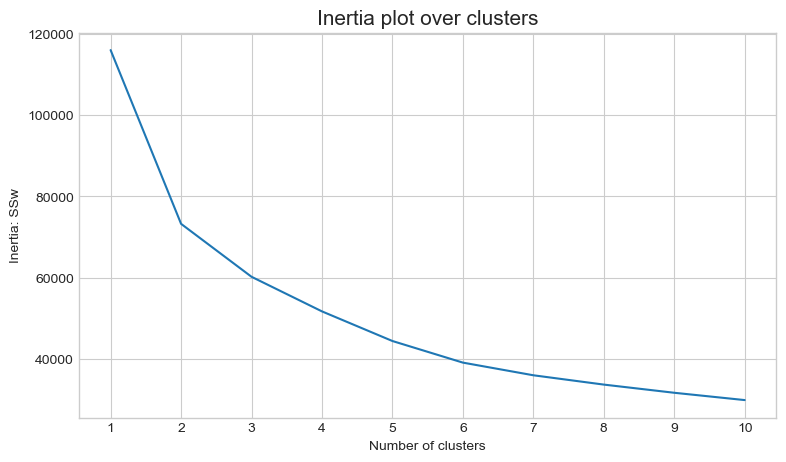

In [75]:
fig, ax = plt.subplots(figsize=(9,5))

ax.plot(range_clusters, inertia)
ax.set_xticks(range_clusters)
ax.set_ylabel("Inertia: SSw")
ax.set_xlabel("Number of clusters")
ax.set_title("Inertia plot over clusters", size=15)

plt.show()

For n_clusters = 2, the average silhouette_score is : 0.3871786863106134
For n_clusters = 3, the average silhouette_score is : 0.4037907910866237
For n_clusters = 4, the average silhouette_score is : 0.28389001555066296
For n_clusters = 5, the average silhouette_score is : 0.29558150567512687
For n_clusters = 6, the average silhouette_score is : 0.2859729246833214
For n_clusters = 7, the average silhouette_score is : 0.2438881892193327
For n_clusters = 8, the average silhouette_score is : 0.22562927175590206
For n_clusters = 9, the average silhouette_score is : 0.23182083652190566
For n_clusters = 10, the average silhouette_score is : 0.22670238137522833


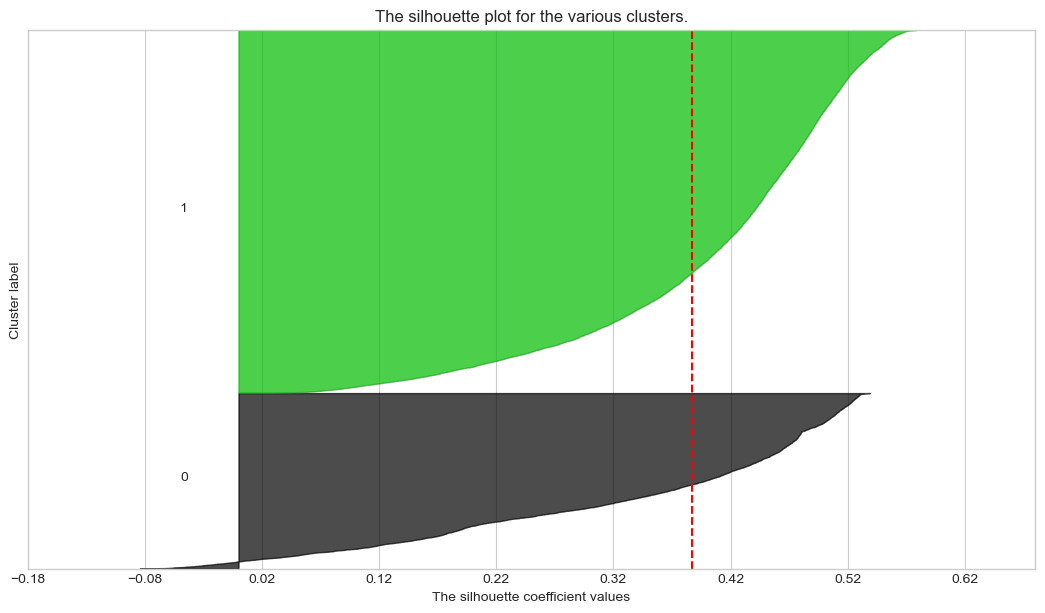

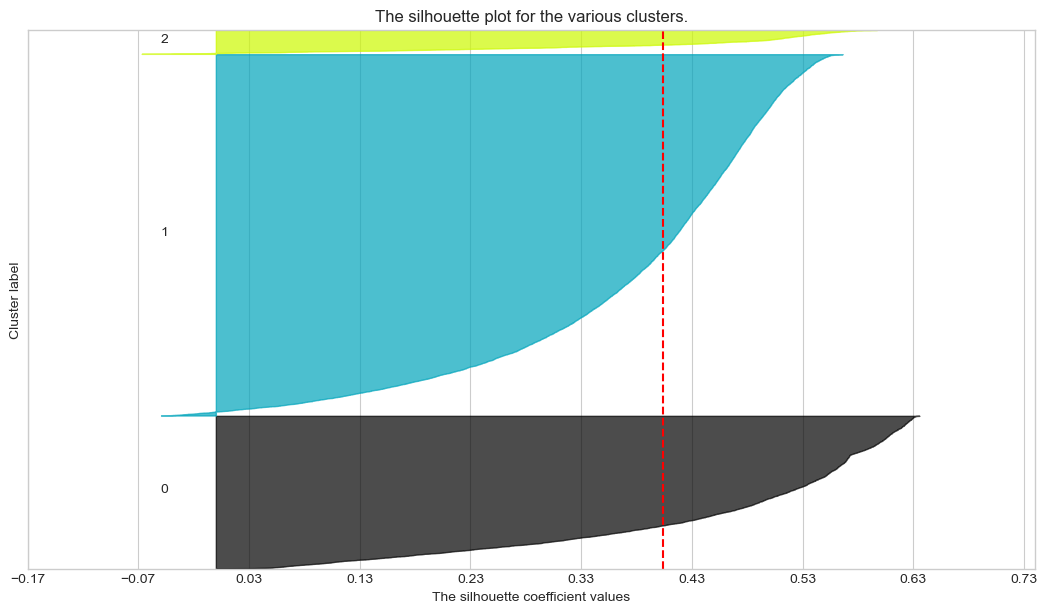

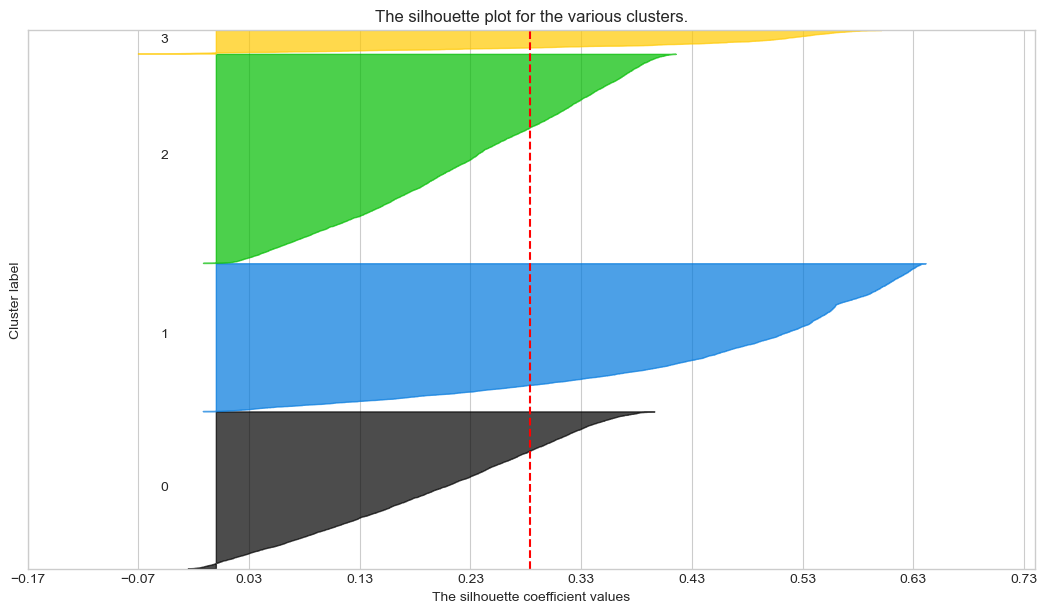

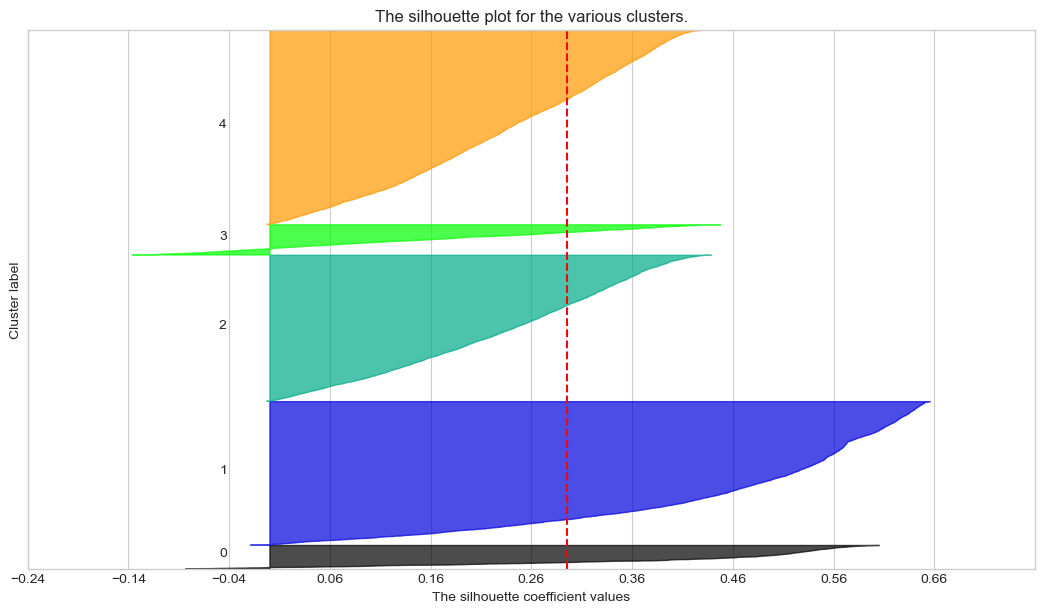

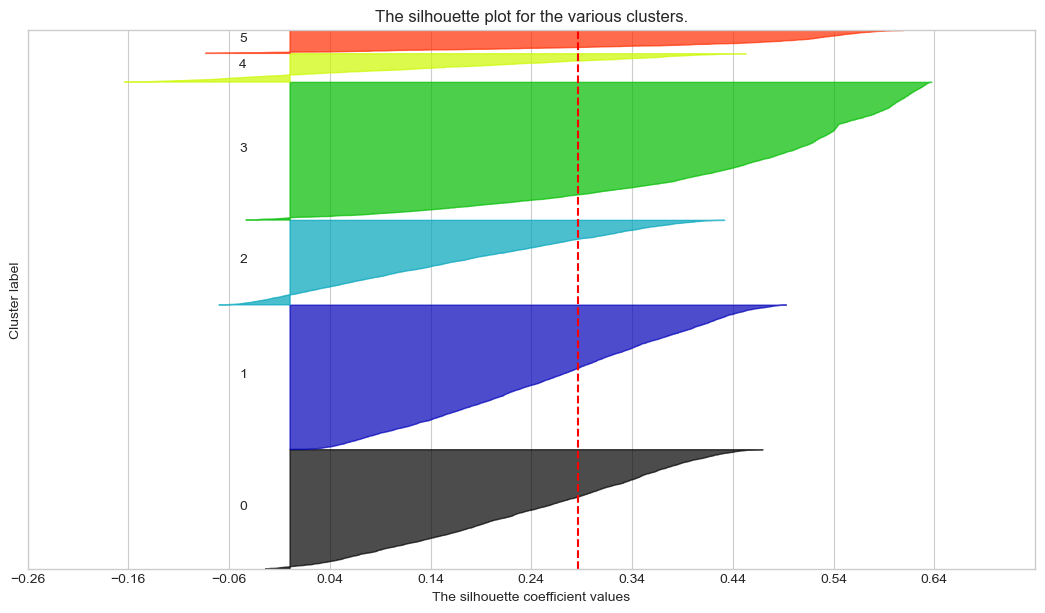

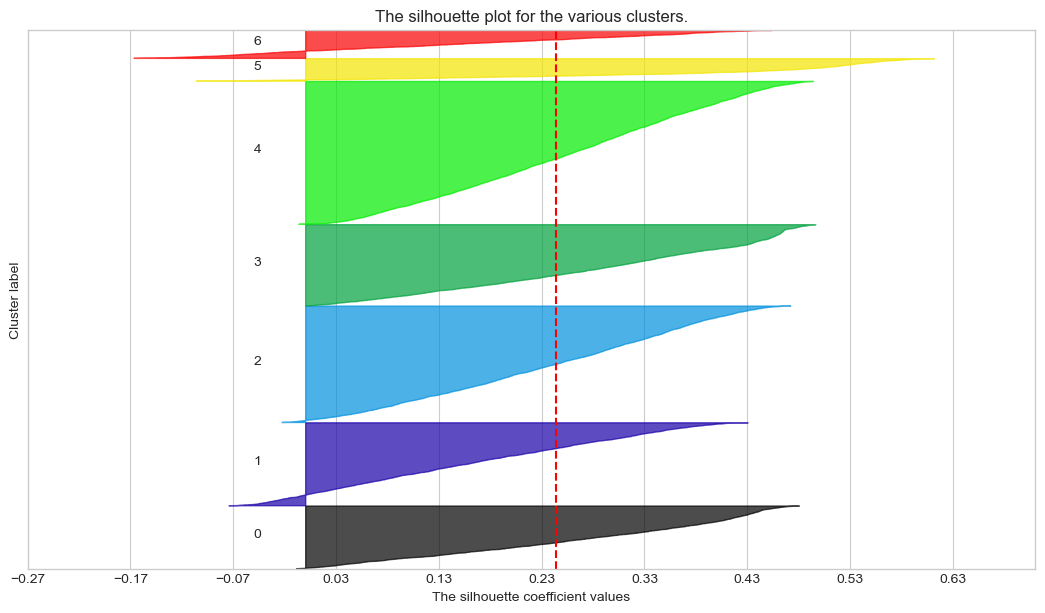

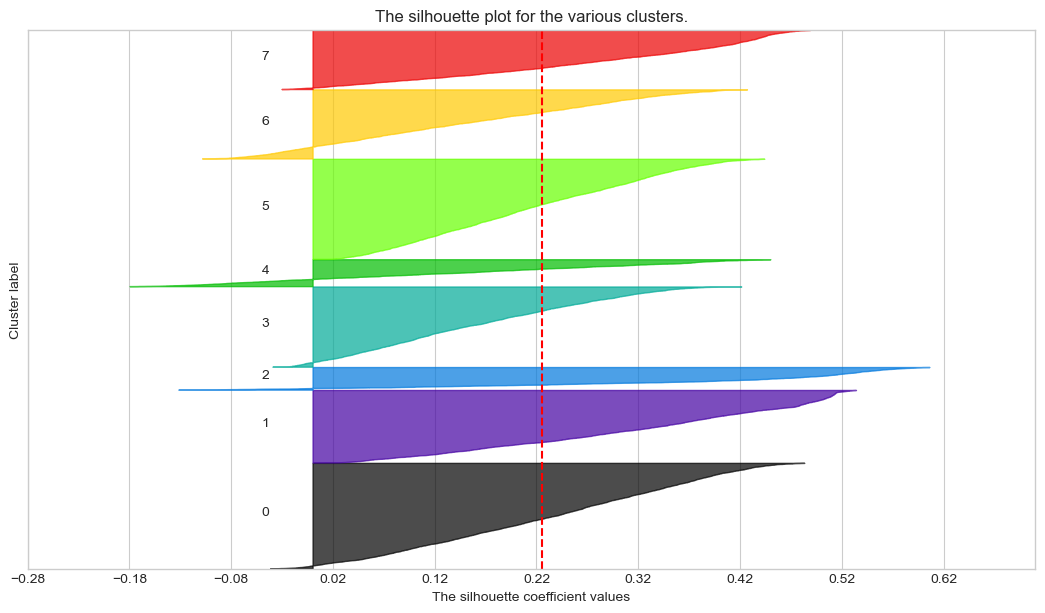

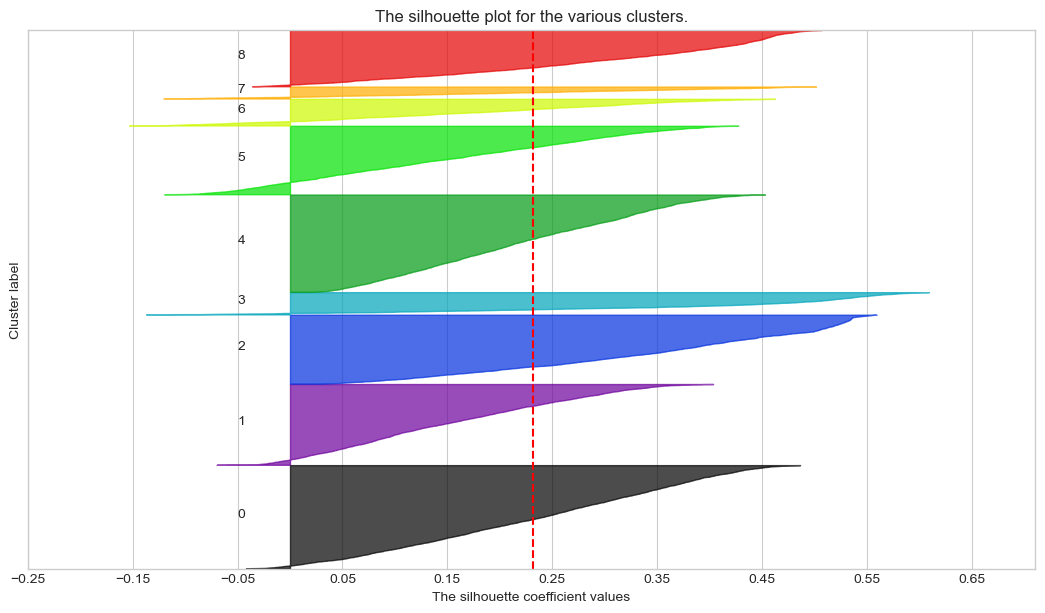

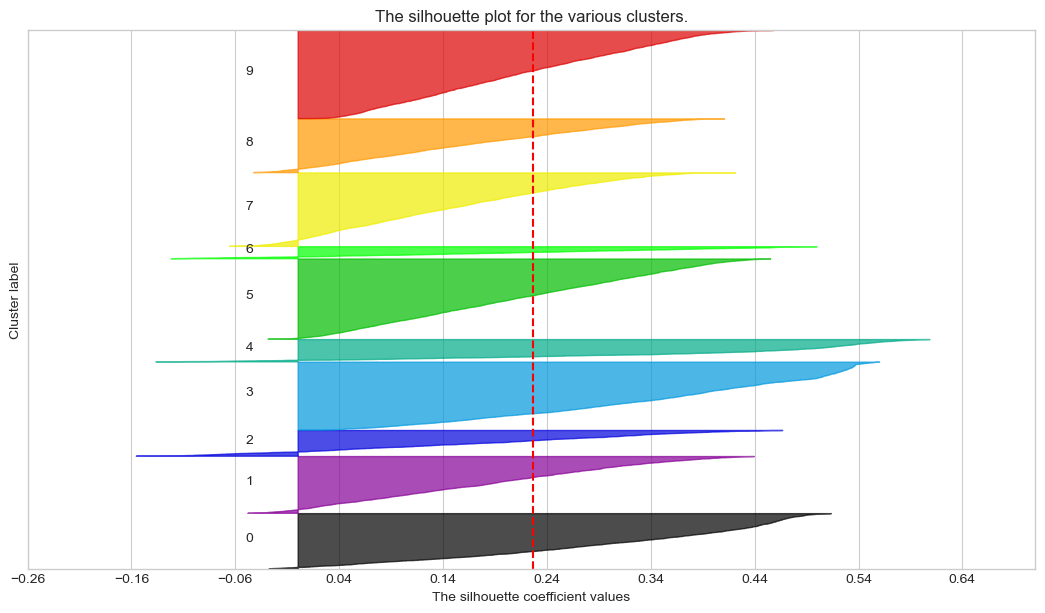

In [76]:
avg_silhouette = []
for nclus in range_clusters:
    # Skip nclus == 1
    if nclus == 1:
        continue

    # Create a figure
    fig = plt.figure(figsize=(13, 7))

    # Initialize the KMeans object with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmclust = KMeans(n_clusters=nclus, init='k-means++', n_init=15, random_state=1)
    cluster_labels = kmclust.fit_predict(customer[metric_customer])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(customer[metric_customer], cluster_labels)
    avg_silhouette.append(silhouette_avg)
    print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(customer[metric_customer], cluster_labels)

    y_lower = 10
    for i in range(nclus):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        # Get y_upper to demarcate silhouette y range size
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # Filling the silhouette
        color = cm.nipy_spectral(float(i) / nclus)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")

    # The silhouette coefficient can range from -1, 1
    xmin, xmax = np.round(sample_silhouette_values.min() -0.1, 2), np.round(sample_silhouette_values.max() + 0.1, 2)
    plt.xlim([xmin, xmax])

    # The (nclus+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    plt.ylim([0, len(customer[metric_customer]) + (nclus + 1) * 10])

    plt.yticks([])  # Clear the yaxis labels / ticks
    plt.xticks(np.arange(xmin, xmax, 0.1))

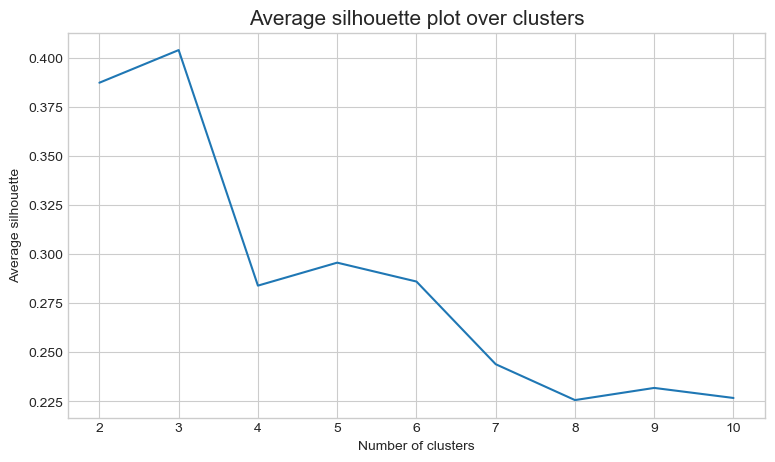

In [77]:
plt.figure(figsize=(9,5))


#  Why range_clusters[1:] ?
# Remember we skipped k=1 in the cell above

plt.plot(range_clusters[1:], ## Plot X-axis;
         avg_silhouette)     ## Plot Y-axis

plt.ylabel("Average silhouette")
plt.xlabel("Number of clusters")
plt.title("Average silhouette plot over clusters", size=15)
plt.show()

In [78]:
number_clusters = 3
kmclust = KMeans(n_clusters=number_clusters, init='k-means++', n_init=15, random_state=1) # increase n_init então melhores resultados but menos eficiente e demora mais tempo
km_labels = kmclust.fit_predict(customer[metric_customer])
km_labels

array([1, 1, 2, ..., 1, 0, 0], dtype=int32)

In [79]:
df_concat = pd.concat((customer[metric_customer], pd.Series(km_labels, name='labels', index=customer.index)), axis=1)
df_concat.groupby('labels').mean()

Income  NumFlights  DistanceKM  PointsAccumulated  PointsRedeemed  \
labels                                                                        
0       0.007077   -1.297088   -1.311209          -1.311178       -0.753372   
1      -0.000530    0.602087    0.609007           0.608993        0.347791   
2      -0.037065   -0.827144   -0.841646          -0.841642       -0.451572   

        Customer Lifetime Value  recency_months  
labels                                           
0                      0.018597       -0.272608  
1                     -0.005324       -0.163631  
2                     -0.038071        4.205071

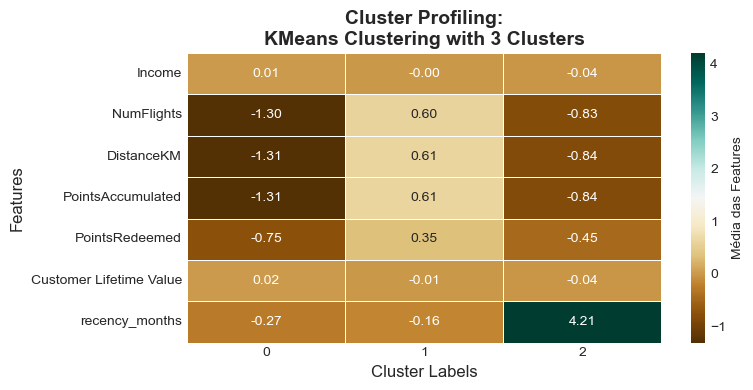

In [80]:
fig, ax = plt.subplots(figsize=(8, 4))

km_profile = df_concat.groupby('labels').mean().T

sns.heatmap(
    km_profile,
    annot=True,
    fmt=".2f",
    cmap="BrBG",
    linewidths=0.5,
    cbar_kws={'label': 'Média das Features'},
    ax=ax
)

ax.set_xlabel("Cluster Labels", fontsize=12)
ax.set_ylabel("Features", fontsize=12)
ax.set_title("Cluster Profiling:\nKMeans Clustering with 3 Clusters", fontsize=14, fontweight='bold')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()